### Goal is to predict the prices of used cars.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')


In [2]:
car=pd.read_csv(r'C:\Users\tusha\Desktop\flip robo\project 9\New folder\used_cars.csv')
car

,Unnamed: 0,brand,model,varient,mf_year,dr_kms,fuel_type,no_of_owners,location,transmission,price
0,0,Hyundai,Elite i20,Asta 1.2,2015,"72,000 km",Petrol,1st,Bengaluru,Manual,"₹ 6,25,000"
1,1,Maruti Suzuki,Omni,5 Seater,2017,"24,000 km",Petrol,2nd,Bengaluru,Manual,"₹ 2,90,000"
2,2,Maruti Suzuki,Swift Dzire,VDI,2017,"91,000 km",Diesel,1st,Bengaluru,Manual,"₹ 7,10,000"
3,3,Skoda,Rapid,1.5 TDI Manual active ambition style,2012,"86,000 km",Diesel,2nd,Bengaluru,Manual,"₹ 4,15,000"
4,4,Maruti Suzuki,Wagon R,LXI,2014,"66,000 km",Petrol,1st,Bengaluru,Manual,"₹ 3,95,000"
...,...,...,...,...,...,...,...,...,...,...,...
5776,1369,Maruti,Swift,ZDI,2015,"83,000 kms",Diesel,First Owner,pune,Manual,6.15 Lakh*
5777,1370,Hyundai,i20,Petrol CVT Asta,2018,"17,908 Kms",Petrol,1st Owner,pune,Automatic,"₹ 7,65,500"
5778,1371,Maruti,Vitara,Brezza ZDi,2018,"43,089 kms",Diesel,First Owner,pune,Manual,9.2 Lakh*
5779,1372,Hyundai,i20,Sportz 1.2,2013,"52,230 kms",Petrol,First Owner,pune,Manual,4.45 Lakh*


In [3]:
car.shape

(5781, 11)

In [4]:
# It shows that there are 5781 rows and 11 columns in our datset.

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    5781 non-null   int64 
 1   brand         5781 non-null   object
 2   model         5714 non-null   object
 3   varient       5775 non-null   object
 4   mf_year       5781 non-null   int64 
 5   dr_kms        5781 non-null   object
 6   fuel_type     5781 non-null   object
 7   no_of_owners  5781 non-null   object
 8   location      5781 non-null   object
 9   transmission  5690 non-null   object
 10  price         5781 non-null   object
dtypes: int64(2), object(9)
memory usage: 496.9+ KB


In [6]:
# All column are of object type other than mf_year

In [7]:
car.groupby('fuel_type').size() / car.shape[0] * 100

fuel_type
CNG               0.311365
CNG & Hybrids     0.899498
Diesel           33.021969
Electric          0.017298
LPG               0.467047
Petrol           64.331431
Petrol + CNG      0.709220
Petrol + LPG      0.242173
dtype: float64

In [8]:
# From above we can see that in our dataset there are more than 33% cars which runs on diesel
# More than 64%  cars used petrol
# Rest fuel type which include electric hybrid and fuel percentage is very low.
# All fuel other than petrol and diesel is very small that will have very less impact on our analysis, so we will drop them.

In [9]:
car.drop(car[(car['fuel_type'] == 'Electric') | (car['fuel_type'] == 'Hybrid') | (car['fuel_type'] == 'Other')].index, inplace= True)

In [10]:
# droping the column name unnamed
car.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [11]:
#checking null values
car.isnull().sum()

brand            0
model           67
varient          6
mf_year          0
dr_kms           0
fuel_type        0
no_of_owners     0
location         0
transmission    91
price            0
dtype: int64

In [1]:
# There are missing values present in the model.

In [12]:
#droping the null rows
car = car.dropna()

In [13]:
car

,brand,model,varient,mf_year,dr_kms,fuel_type,no_of_owners,location,transmission,price
0,Hyundai,Elite i20,Asta 1.2,2015,"72,000 km",Petrol,1st,Bengaluru,Manual,"₹ 6,25,000"
1,Maruti Suzuki,Omni,5 Seater,2017,"24,000 km",Petrol,2nd,Bengaluru,Manual,"₹ 2,90,000"
2,Maruti Suzuki,Swift Dzire,VDI,2017,"91,000 km",Diesel,1st,Bengaluru,Manual,"₹ 7,10,000"
3,Skoda,Rapid,1.5 TDI Manual active ambition style,2012,"86,000 km",Diesel,2nd,Bengaluru,Manual,"₹ 4,15,000"
4,Maruti Suzuki,Wagon R,LXI,2014,"66,000 km",Petrol,1st,Bengaluru,Manual,"₹ 3,95,000"
...,...,...,...,...,...,...,...,...,...,...
5776,Maruti,Swift,ZDI,2015,"83,000 kms",Diesel,First Owner,pune,Manual,6.15 Lakh*
5777,Hyundai,i20,Petrol CVT Asta,2018,"17,908 Kms",Petrol,1st Owner,pune,Automatic,"₹ 7,65,500"
5778,Maruti,Vitara,Brezza ZDi,2018,"43,089 kms",Diesel,First Owner,pune,Manual,9.2 Lakh*
5779,Hyundai,i20,Sportz 1.2,2013,"52,230 kms",Petrol,First Owner,pune,Manual,4.45 Lakh*


In [14]:
# checking the brands 
car["brand"].unique()

array(['Hyundai', 'Maruti Suzuki', 'Skoda', 'Ford', 'Mahindra', 'Toyota',
       'Tata', 'Renault', 'Mercedes-Benz', 'Chevrolet', 'Fiat', 'Honda',
       'Ssangyong', 'Volvo', 'Volkswagen', 'BMW', 'Mini', 'Aston Martin',
       'Isuzu', 'Audi', 'MG', 'Force Motors', 'Land Rover', 'Bentley',
       'Nissan', 'Datsun', 'Jaguar', 'Other Brands', 'Hummer',
       'Lamborghini', 'Maserati', 'Mahindra Renault', 'Ferrari',
       'Mitsubishi', 'Kia', 'Premier', 'Jeep', 'Ashok Leyland', 'Daewoo',
       'Ambassador', 'Bajaj', 'Hindustan Motors', 'ICML', 'Maruti',
       'Mercedes', 'KIA', 'Landrover', 'Porsche', 'Land'], dtype=object)

In [15]:
car[car["brand"] == "Land"]

,brand,model,varient,mf_year,dr_kms,fuel_type,no_of_owners,location,transmission,price
4617,Land,Rover,Range Rover 3.6 TDV8 Vogue SE Diesel,2011,"77,000 kms",Diesel,First Owner,bengaluru,Automatic,33 Lakh*
4986,Land,Rover,Discovery Sport TD4 HSE 7S,2018,"52,039 kms",Diesel,First Owner,hyderabad,Automatic,44.75 Lakh*
5244,Land,Rover,Freelander 2 HSE,2013,"90,000 kms",Diesel,Third Owner,jaipur,Automatic,10 Lakh*
5476,Land,Rover,Range Rover Evoque 2.0 TD4 SE Dynamic,2017,"24,500 kms",Diesel,First Owner,new-delhi,Automatic,40.5 Lakh*
5508,Land,Rover,Discovery Sport SD4 HSE Luxury,2016,"68,000 kms",Diesel,First Owner,new-delhi,Automatic,33 Lakh*


In [16]:
#changing the Rover model to range rover
car.loc[car["brand"] == "Land", "model"] = 'Range Rover'

In [17]:
#From brand names, we understood that Maruti, land rover and mercedes is written in more
#than one format. so we are going to make each of them to single name
car.loc[car["brand"] == "Land", "brand"] = 'Land Rover'
car.loc[car["brand"] == "Landrover", "brand"] = 'Land Rover'
car.loc[car["brand"] == "Maruti Suzuki", "brand"] = 'Maruti'
car.loc[car["brand"] == "Mercedes-Benz", "brand"] = 'Mercedes'

In [18]:
#remove "km" string and convert to integer for driven kilometers column
car["dr_kms"] = car["dr_kms"].apply(lambda x: int(re.sub('[,kms]', '', x.lower())))

In [19]:
car["fuel_type"].unique()

array(['Petrol', 'Diesel', 'LPG', 'CNG & Hybrids', 'Petrol + LPG',
       'Petrol + CNG', 'CNG'], dtype=object)

In [20]:
car["no_of_owners"].unique()

array(['1st', '2nd', '3rd', '4th', '4+', '1st Owner', '2nd Owner',
       '3rd Owner', '4th Owner', 'Second Owner', 'Third Owner',
       'First Owner', 'Fourth & Above Owner', 'Test Drive Car'],
      dtype=object)

In [21]:
#unifying the no of owner information
car.loc[car["no_of_owners"] == "1st", "no_of_owners"] = 'First Owner'
car.loc[car["no_of_owners"] == "2nd", "no_of_owners"] = 'Second Owner'
car.loc[car["no_of_owners"] == "3rd", "no_of_owners"] = 'Third Owner'
car.loc[car["no_of_owners"] == "4th Owner", "no_of_owners"] = 'Fourth Owner'
car.loc[car["no_of_owners"] == "2nd Owner", "no_of_owners"] = 'Second Owner'
car.loc[car["no_of_owners"] == "4+", "no_of_owners"] = 'Fourth & Above Owner'
car.loc[car["no_of_owners"] == "1st Owner", "no_of_owners"] = 'First Owner'
car.loc[car["no_of_owners"] == "3rd Owner", "no_of_owners"] = 'Third Owner'
car.loc[car["no_of_owners"] == "4th", "no_of_owners"] = 'Fourth Owner'

In [22]:
car["no_of_owners"].unique()

array(['First Owner', 'Second Owner', 'Third Owner', 'Fourth Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [23]:
car["location"].unique()

array(['Bengaluru', 'Delhi', 'Mumbai', 'Chennai', 'Hyderabad', 'Kochi',
       'Kozhikode', 'Kolkata', 'Coimbatore', 'Goa', 'bengaluru',
       'chennai', 'new-delhi', 'mumbai', 'pune', 'hyderabad', 'kolkata',
       'ahmedabad', 'jaipur', 'chandigarh', 'kozhikode', 'delhi-ncr',
       'gurgaon', 'noida'], dtype=object)

In [24]:
#unifying the location car
car.loc[car["location"] == "bengaluru", "location"] = 'Bengaluru'
car.loc[car["location"] == "new-delhi", "location"] = 'Delhi'
car.loc[car["location"] == "mumbai", "location"] = 'Mumbai'
car.loc[car["location"] == "chennai", "location"] = 'Chennai'
car.loc[car["location"] == "hyderabad", "location"] = 'Hyderabad'
car.loc[car["location"] == "delhi-ncr", "location"] = 'Delhi'
car.loc[car["location"] == "kozhikode", "location"] = 'Kozhikode'
car.loc[car["location"] == "kolkata", "location"] = 'Kolkata'
car.loc[car["location"] == "ahmedabad", "location"] = 'Ahmedabad'
car.loc[car["location"] == "jaipur", "location"] = 'Jaipur'
car.loc[car["location"] == "chandigarh", "location"] = 'Chandigarh'
car.loc[car["location"] == "gurgaon", "location"] = 'Gurgaon'
car.loc[car["location"] == "noida", "location"] = 'Noida'

In [25]:
car["location"].unique()

array(['Bengaluru', 'Delhi', 'Mumbai', 'Chennai', 'Hyderabad', 'Kochi',
       'Kozhikode', 'Kolkata', 'Coimbatore', 'Goa', 'pune', 'Ahmedabad',
       'Jaipur', 'Chandigarh', 'Gurgaon', 'Noida'], dtype=object)

In [26]:
car["transmission"].value_counts()

Manual          2487
MANUAL          2171
Automatic        605
AUTOMATIC        150
MH-02-x-xxxx      25
                ... 
MH-06-x-xxxx       1
MH11               1
KA-51-x-xxxx       1
AS-06-x-xxxx       1
HR-51-x-xxxx       1
Name: transmission, Length: 73, dtype: int64

In [27]:
car.loc[car["transmission"] == "Manual", "transmission"] = 'MANUAL'
car.loc[car["transmission"] == "Automatic", "transmission"] = 'AUTOMATIC'

In [28]:
car["transmission"].value_counts()

MANUAL          4658
AUTOMATIC        755
MH-02-x-xxxx      25
MH-04-x-xxxx      15
DL-3C-x-xxxx       8
                ... 
MH14               1
MH-06-x-xxxx       1
UP-17-x-xxxx       1
AS-06-x-xxxx       1
HR-51-x-xxxx       1
Name: transmission, Length: 71, dtype: int64

In [29]:
#removing the wrongly scraped car from transmission column
car = car.loc[(car["transmission"] == "MANUAL") | (car["transmission"] == "AUTOMATIC")]

In [30]:
car["transmission"].value_counts()

MANUAL       4658
AUTOMATIC     755
Name: transmission, dtype: int64

In [31]:
#remove unwanted letters and charecters from price and convert into int

In [32]:
car["price"] = car["price"].apply(lambda x: re.sub('[,₹*]', '', x.lower()))

In [33]:
car["price"]

0          625000
1          290000
2          710000
3          415000
4          395000
          ...    
5776    6.15 lakh
5777       765500
5778     9.2 lakh
5779    4.45 lakh
5780    5.95 lakh
Name: price, Length: 5413, dtype: object

In [34]:
car["price"] = car["price"].apply(lambda x: int(float(x.split()[0])*100000) if "lak" in x.lower() else int(x))

In [35]:
car["price"]

0       625000
1       290000
2       710000
3       415000
4       395000
         ...  
5776    615000
5777    765500
5778    919999
5779    445000
5780    595000
Name: price, Length: 5413, dtype: int64

## EDA

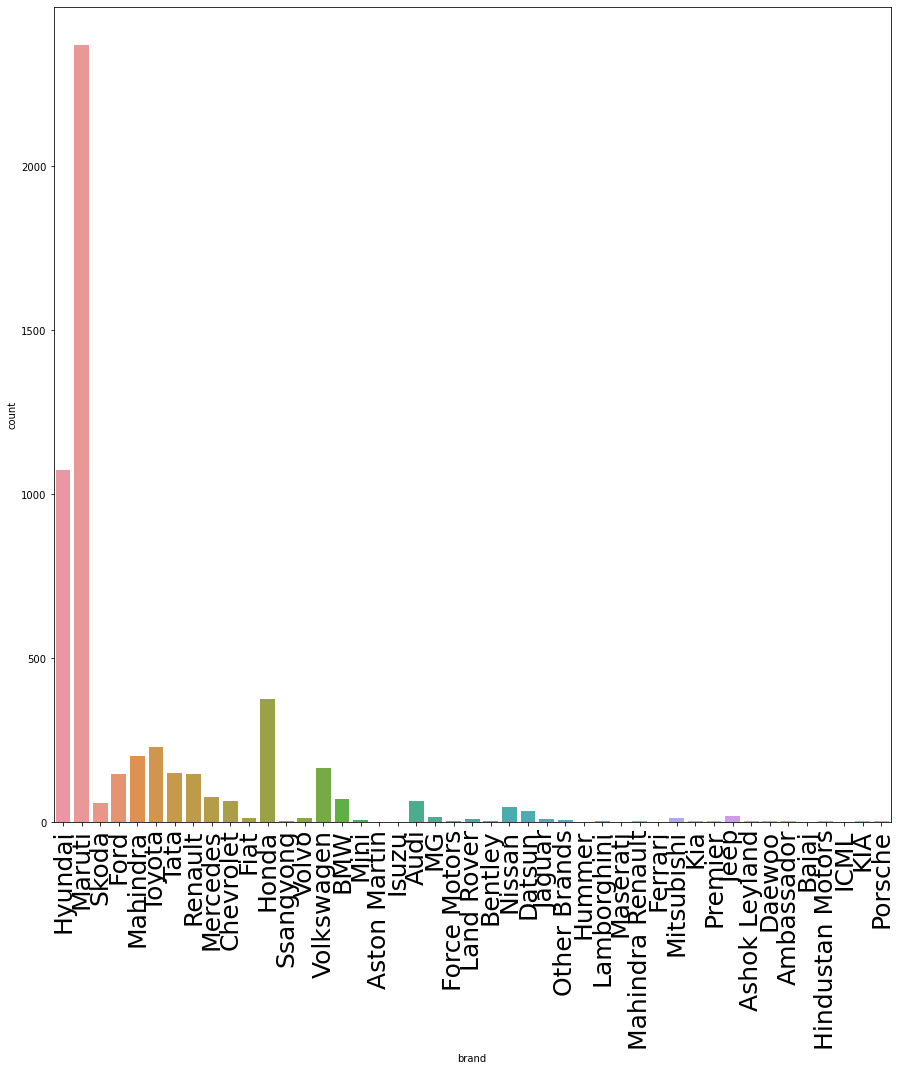

In [37]:
plt.figure(figsize=(15,15))
chart = sns.countplot(car.brand)
chart.tick_params(axis='x', rotation=90, labelsize = 25)

In [38]:
#Most of the vehicles in used car industry are Maruti and Hyundai

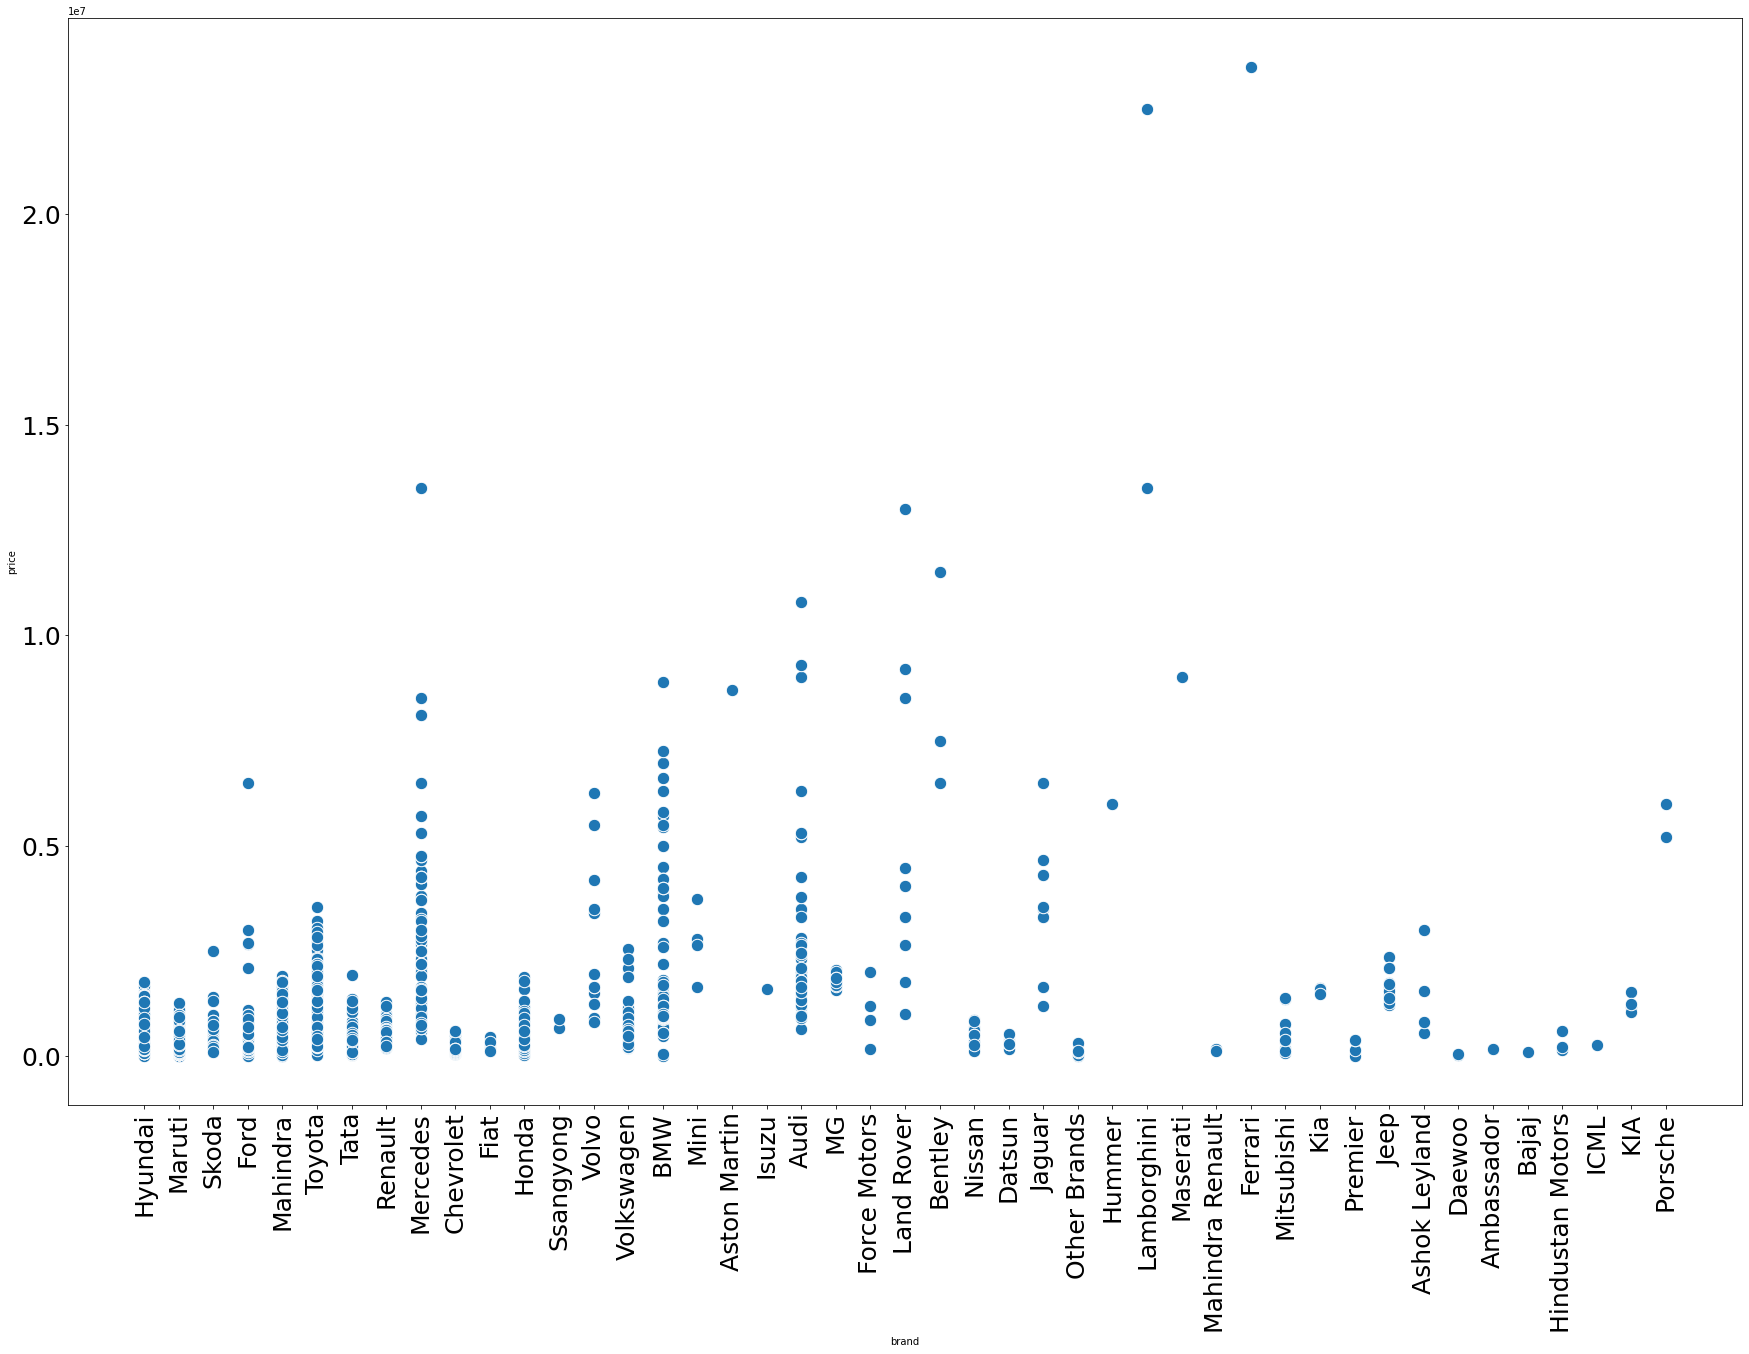

In [39]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(car.brand, car.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [40]:
#Premium vehicles are very less
# The most expensive cars are  ferrari and lamborghini
#hyundai, datsun, and maruti are some of the budget friendly brands

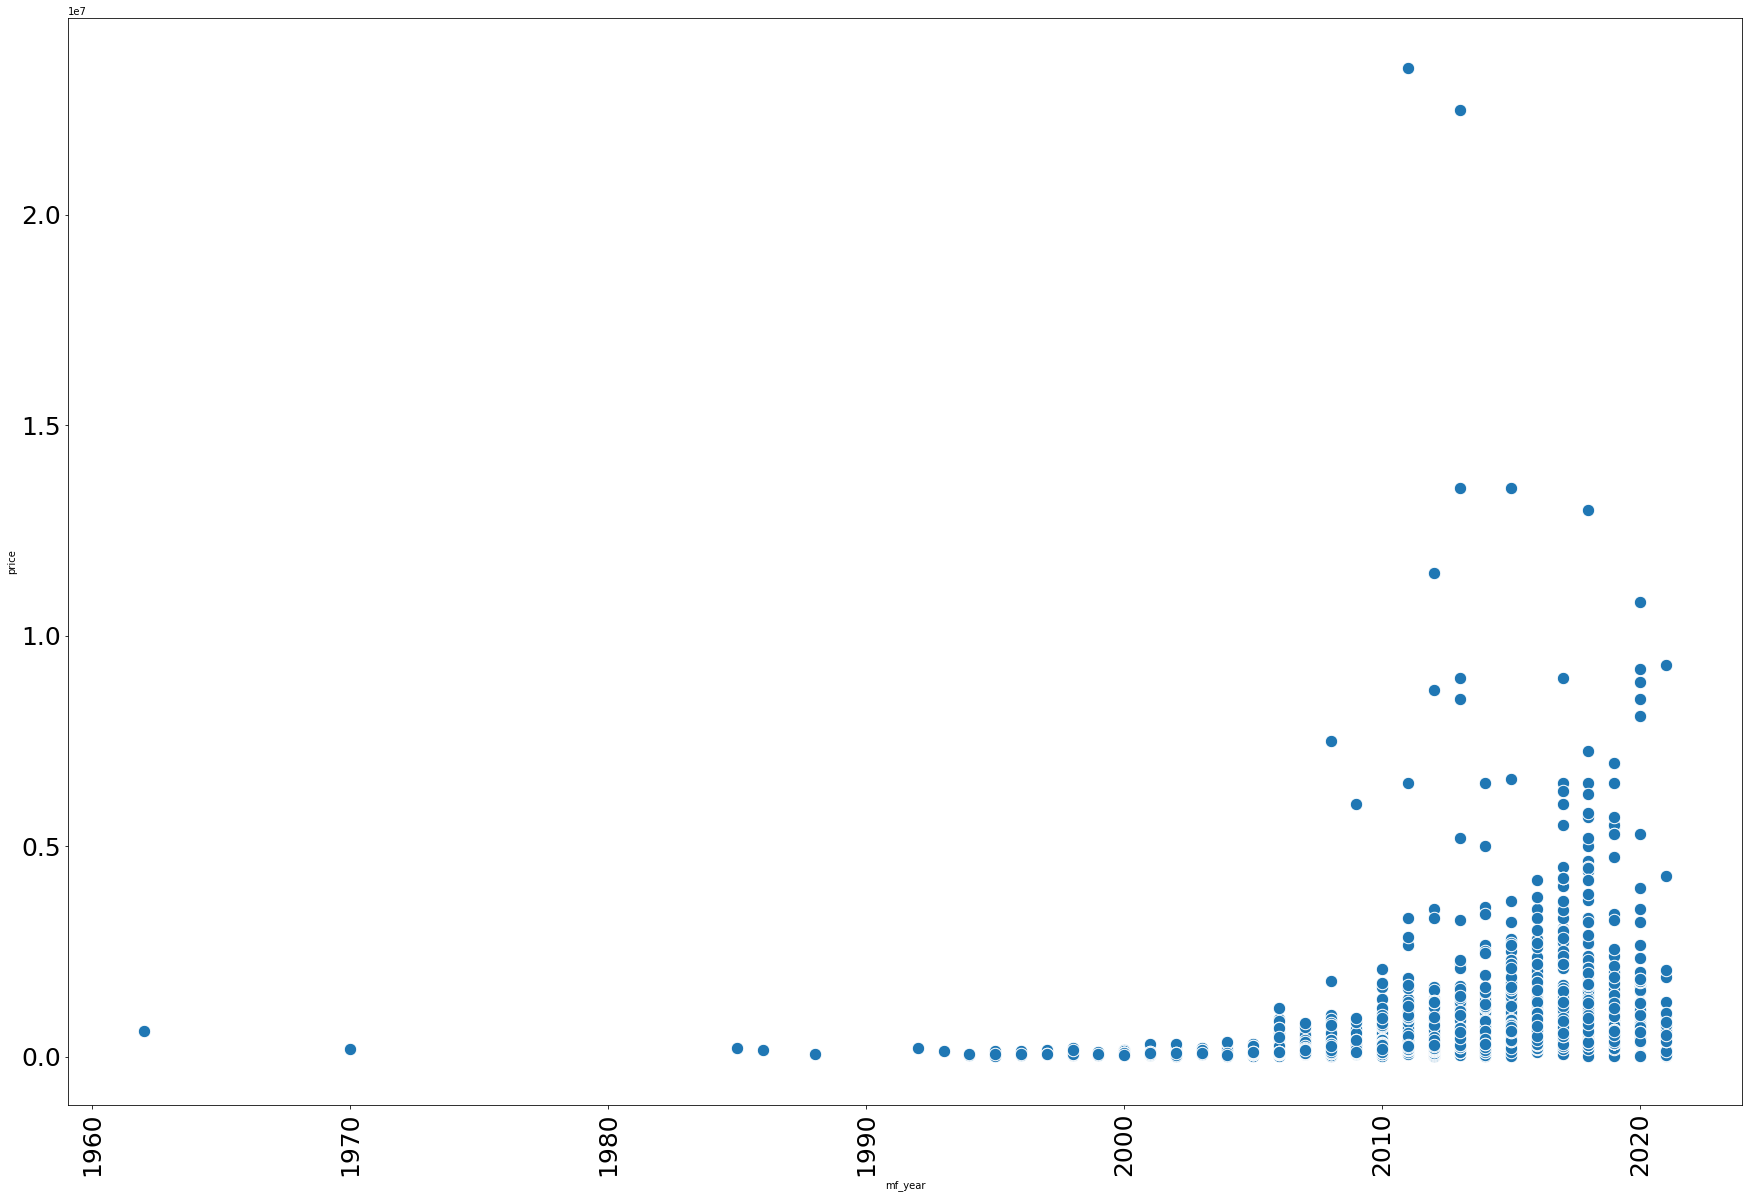

In [41]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(car.mf_year, car.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [42]:
#lesser the age of the vehicle higher will be the price

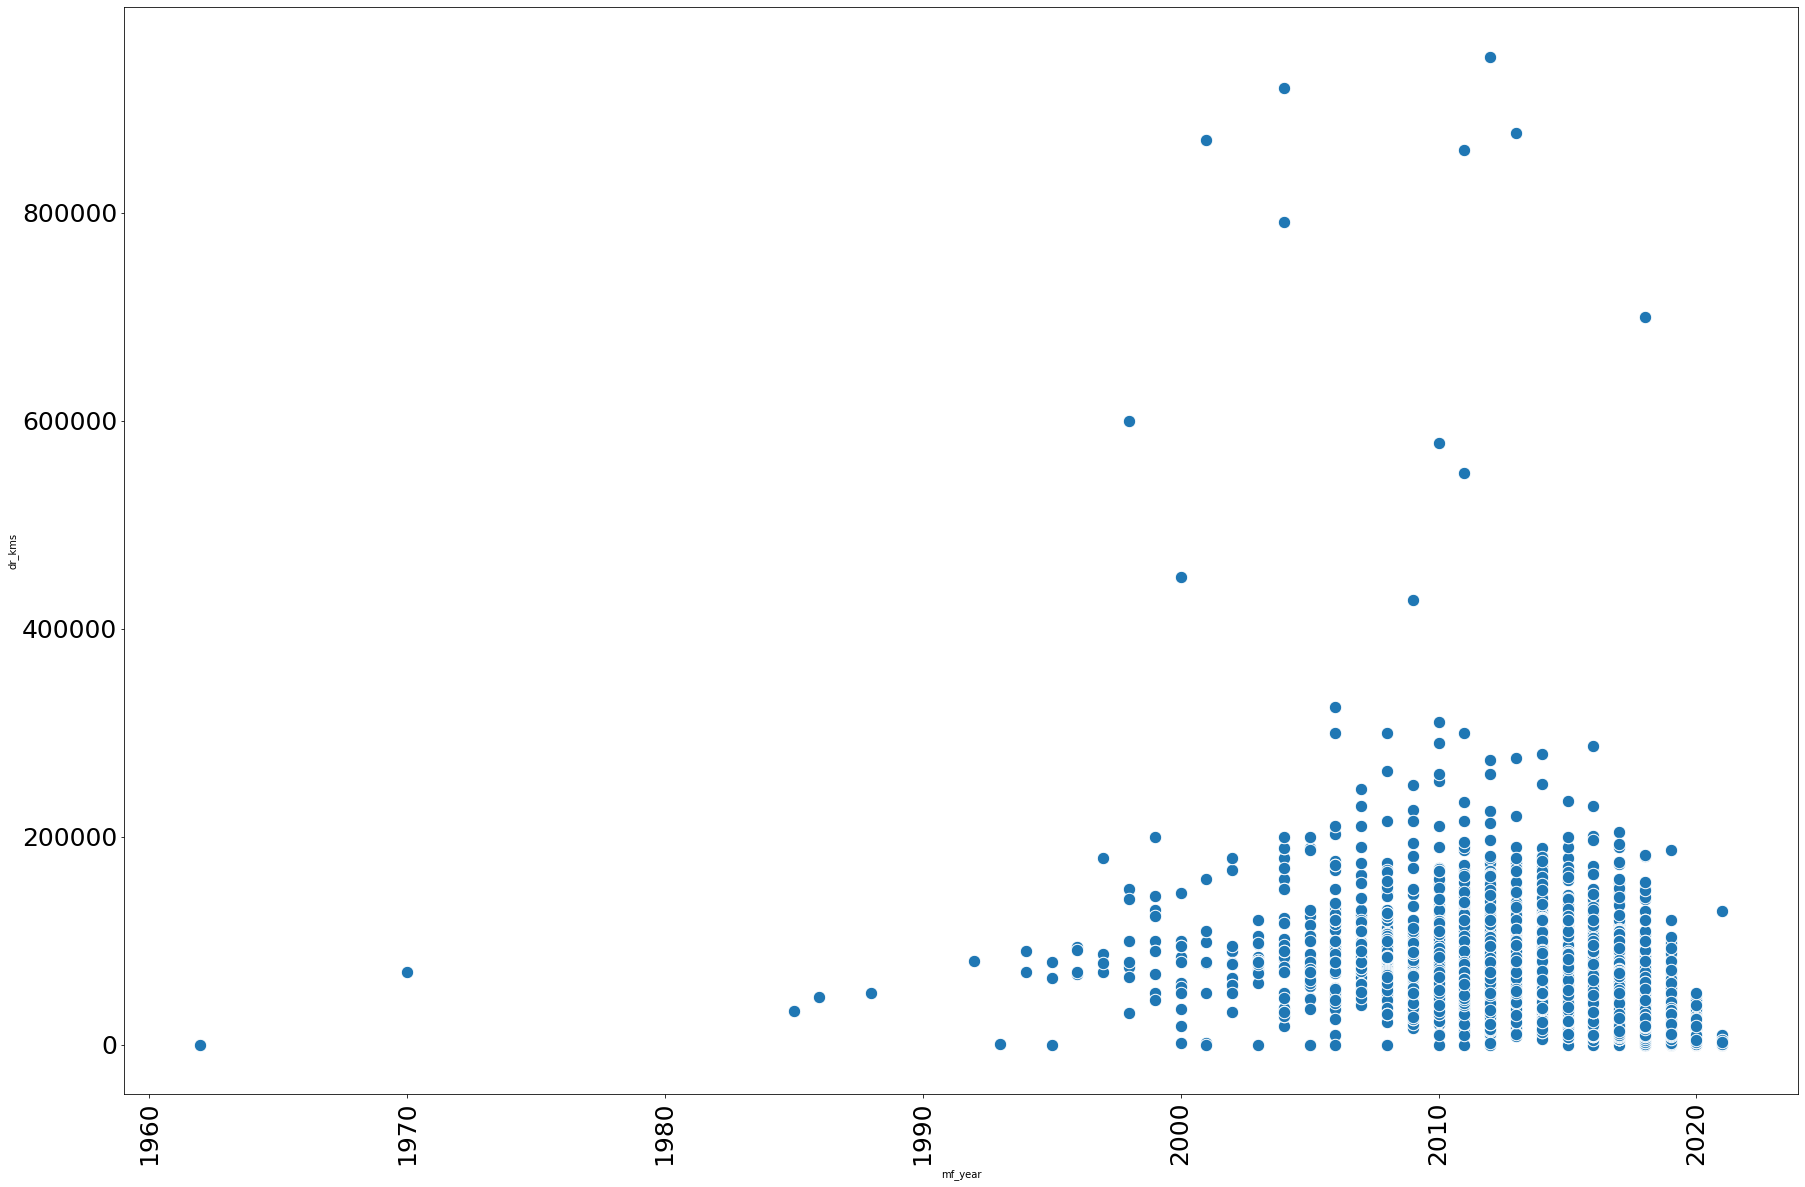

In [43]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(car.mf_year, car.dr_kms, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

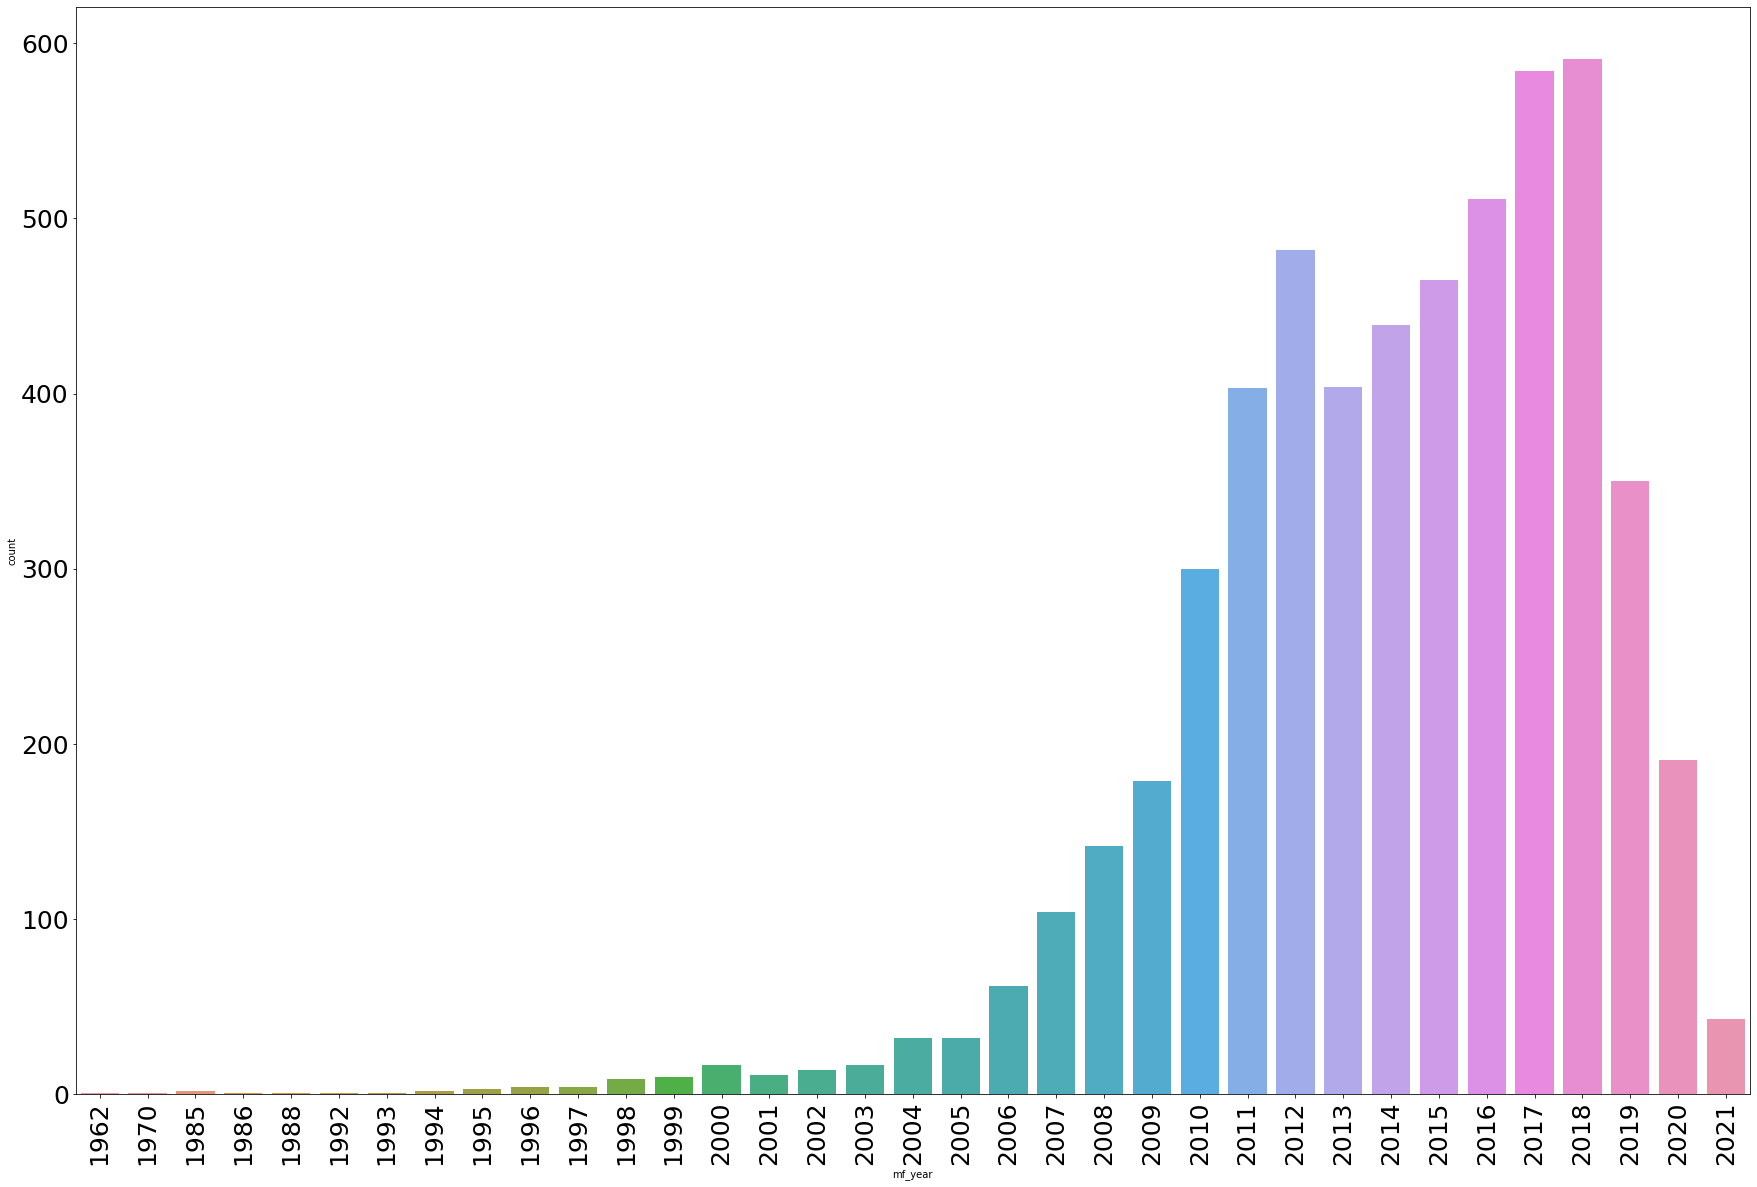

In [44]:
plt.figure(figsize=(30,20))
chart = sns.countplot(car.mf_year)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [45]:
#we can wee that the purchasing of vehicles started booming around 2010
#from 2018, it has been started to decline

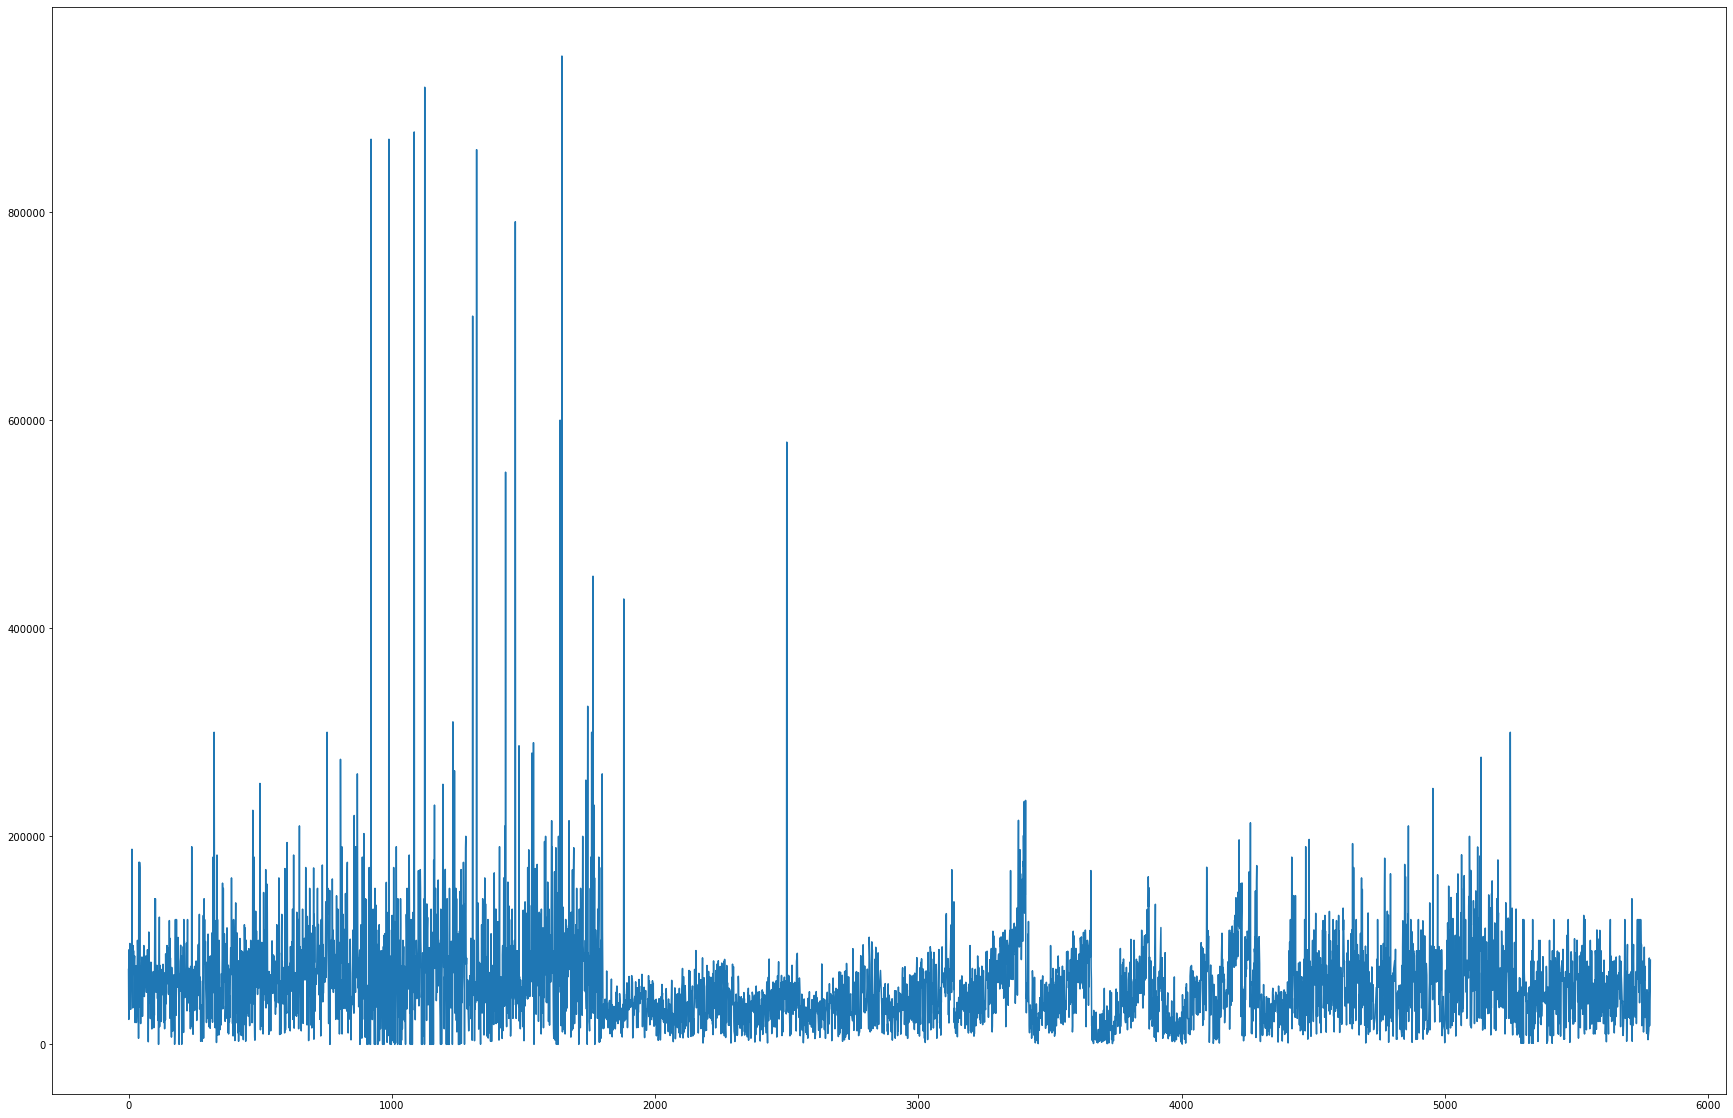

In [46]:
plt.figure(figsize=(30,20))
plt.plot(car.dr_kms)

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

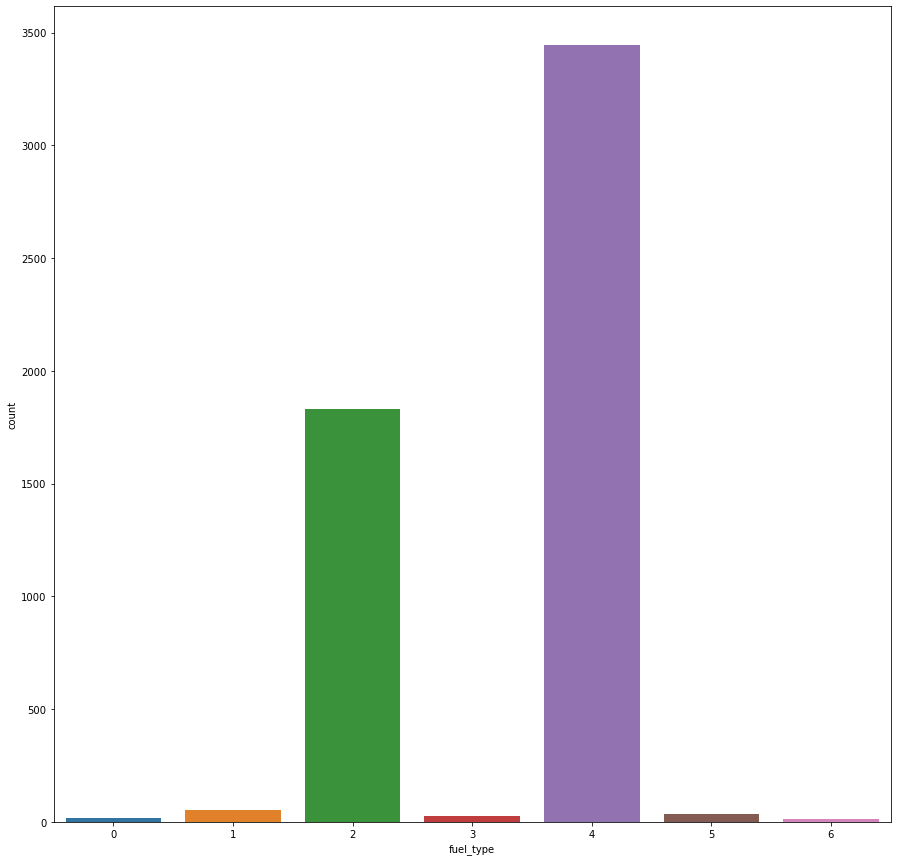

In [102]:
plt.figure(figsize=(15,15))
sns.countplot(car.fuel_type)

In [48]:
#most of the vehicles are petrol
#gas or hybrid vehicles are very less
#no electric vehicles in our carset

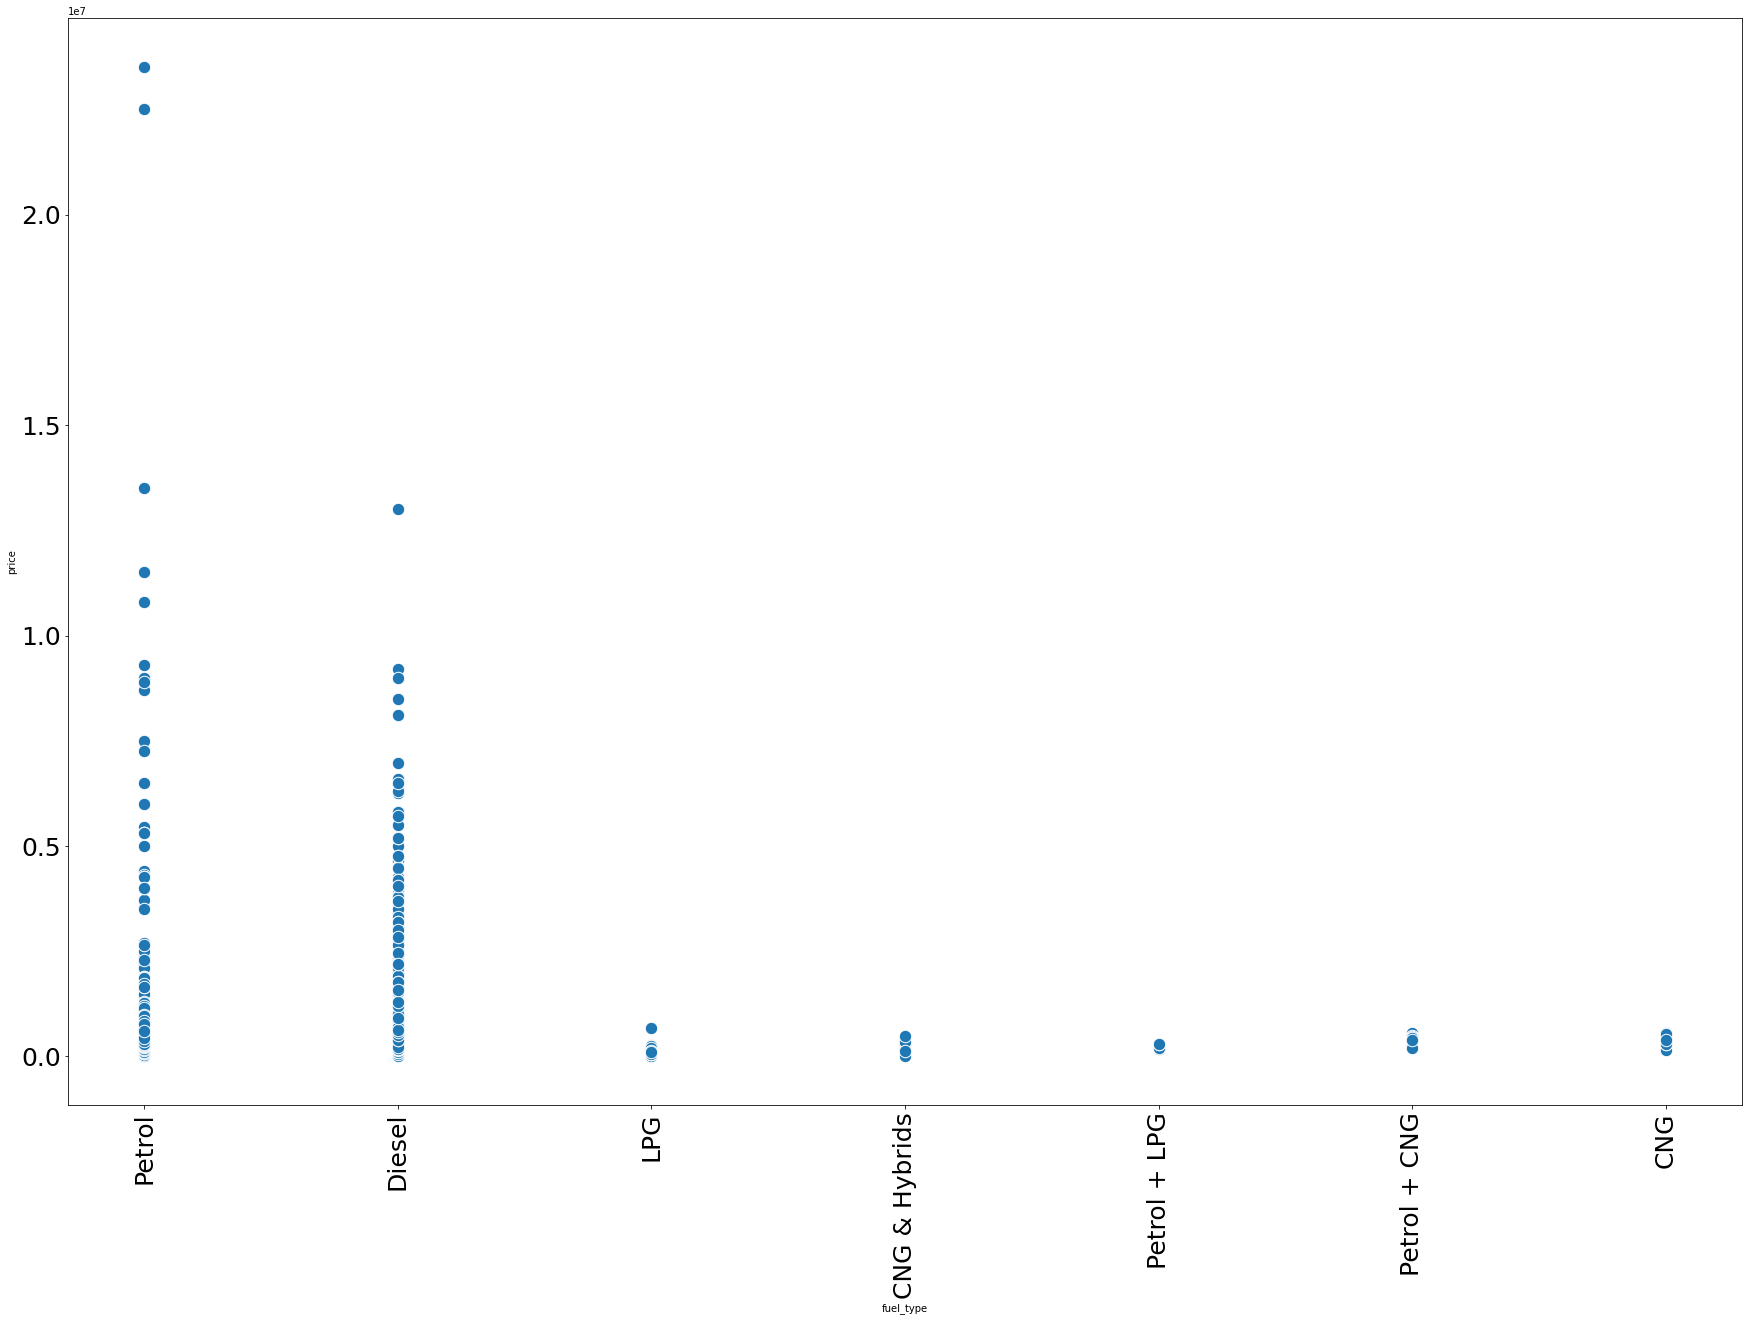

In [49]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(car.fuel_type, car.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [50]:
#In used car industry, uncommon fueled vehicles are cheaper(CNG, LPG etc) than petrol and diesel

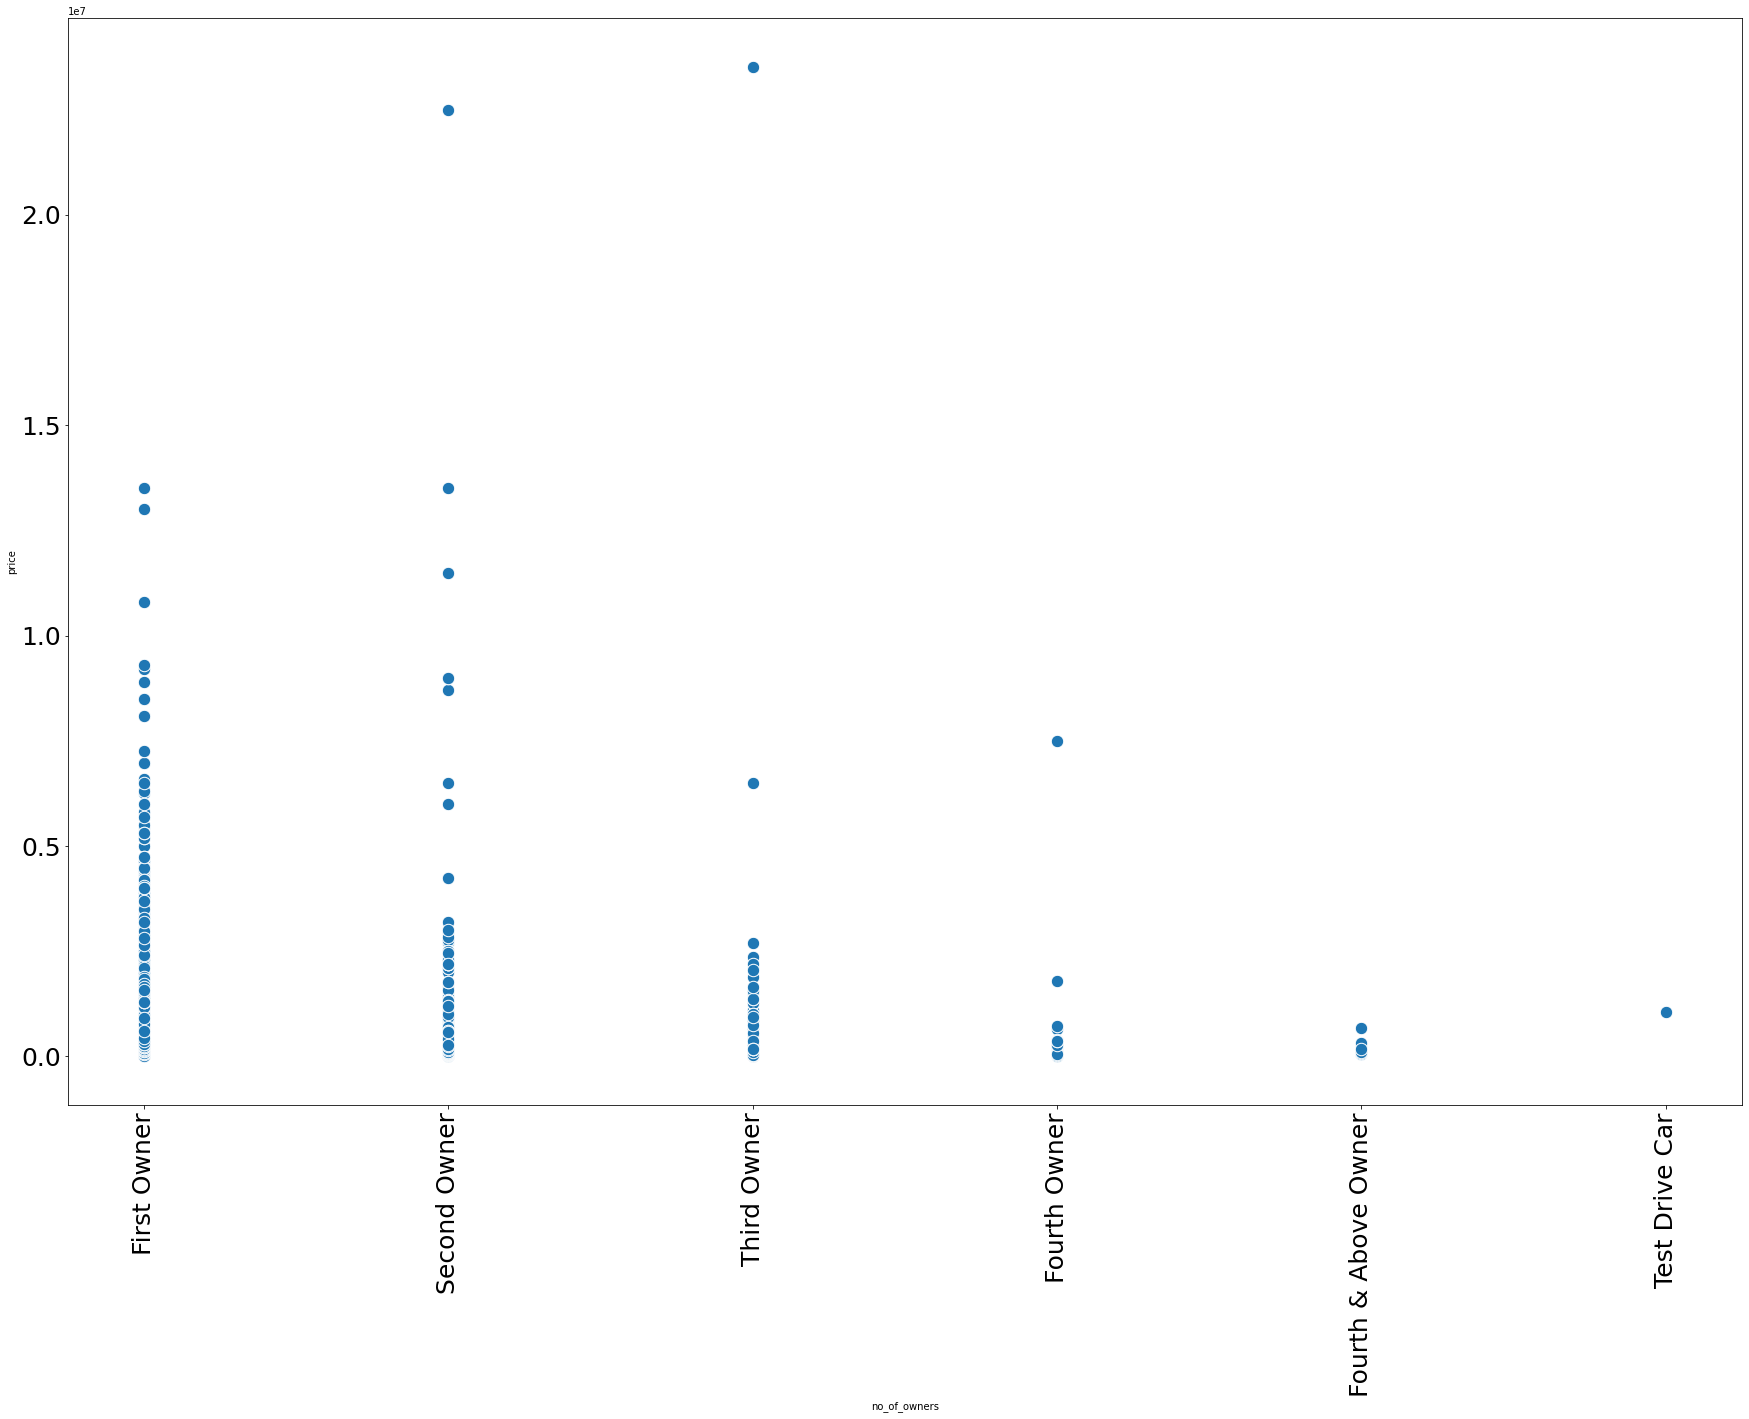

In [51]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(car.no_of_owners, car.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [52]:
#generally we can say that when no. of owners increases, price decreases

<AxesSubplot:xlabel='mf_year', ylabel='Density'>

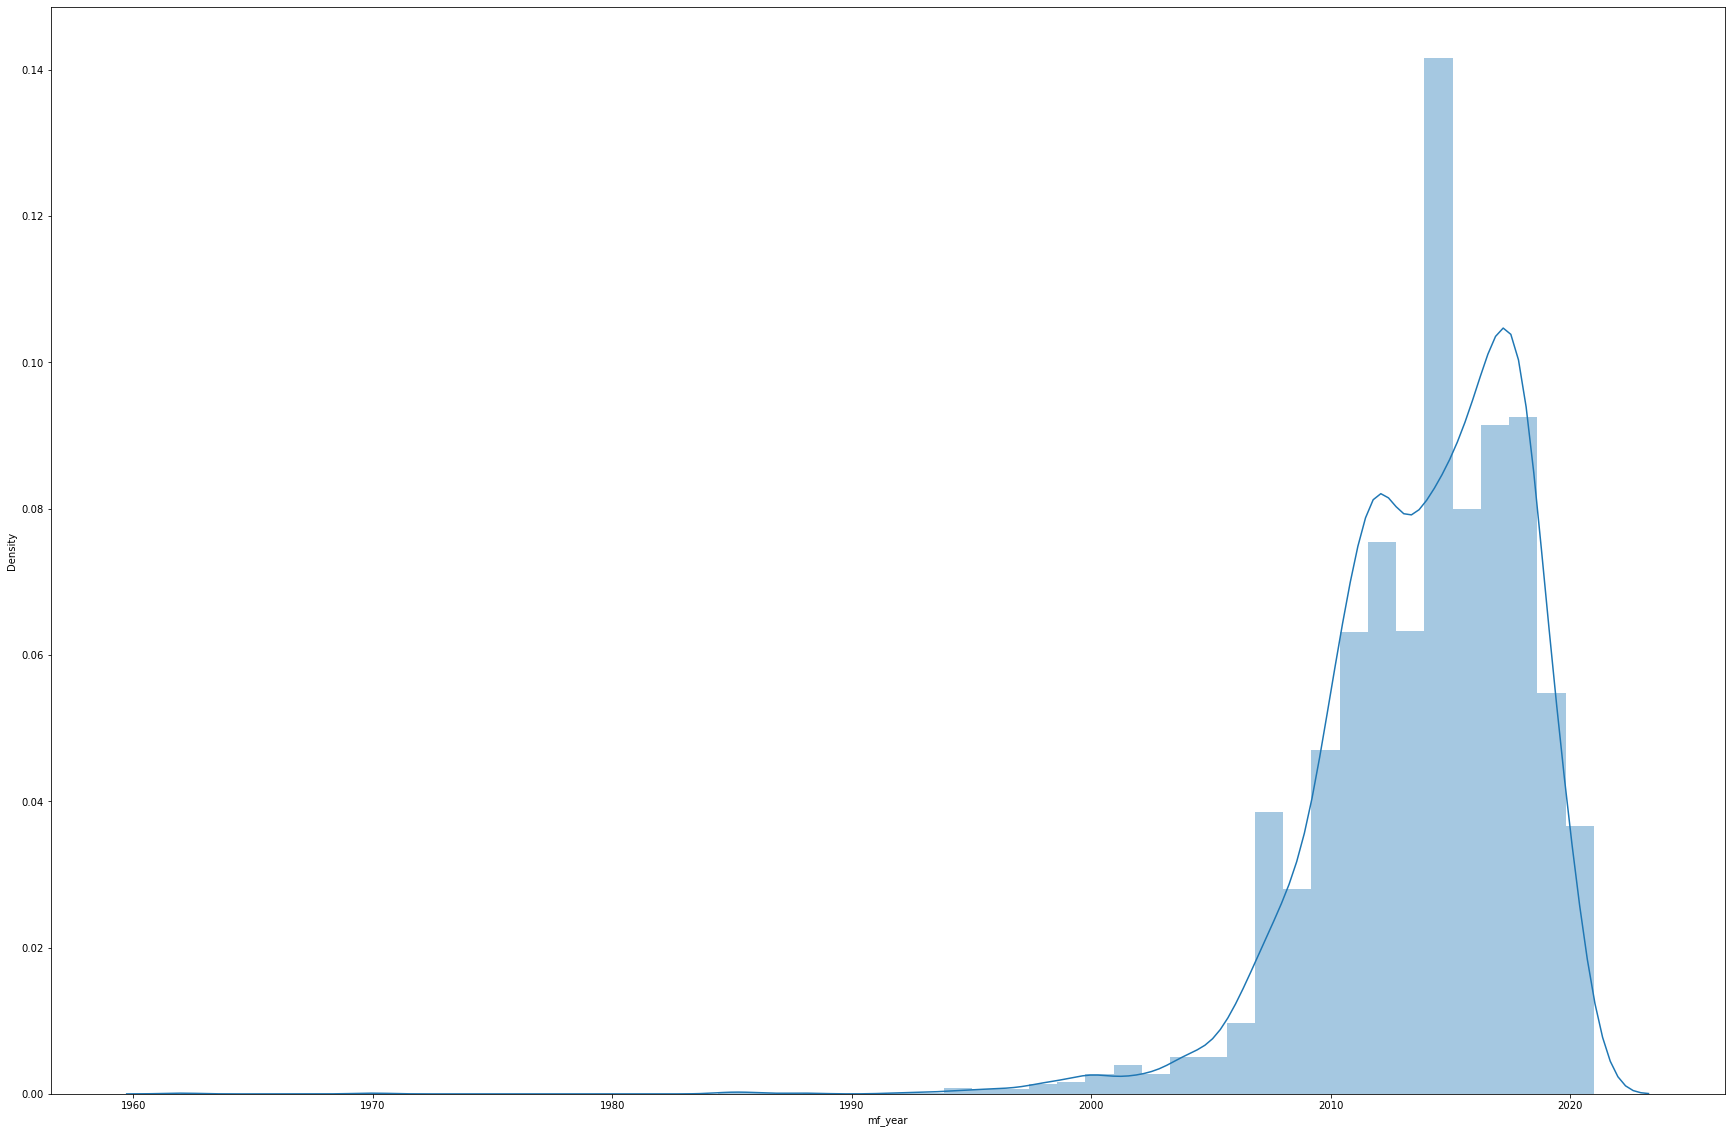

In [53]:
plt.figure(figsize=(30,20))
sns.distplot(car.mf_year)

In [54]:
#mf_year is right skewed

<AxesSubplot:xlabel='dr_kms', ylabel='Density'>

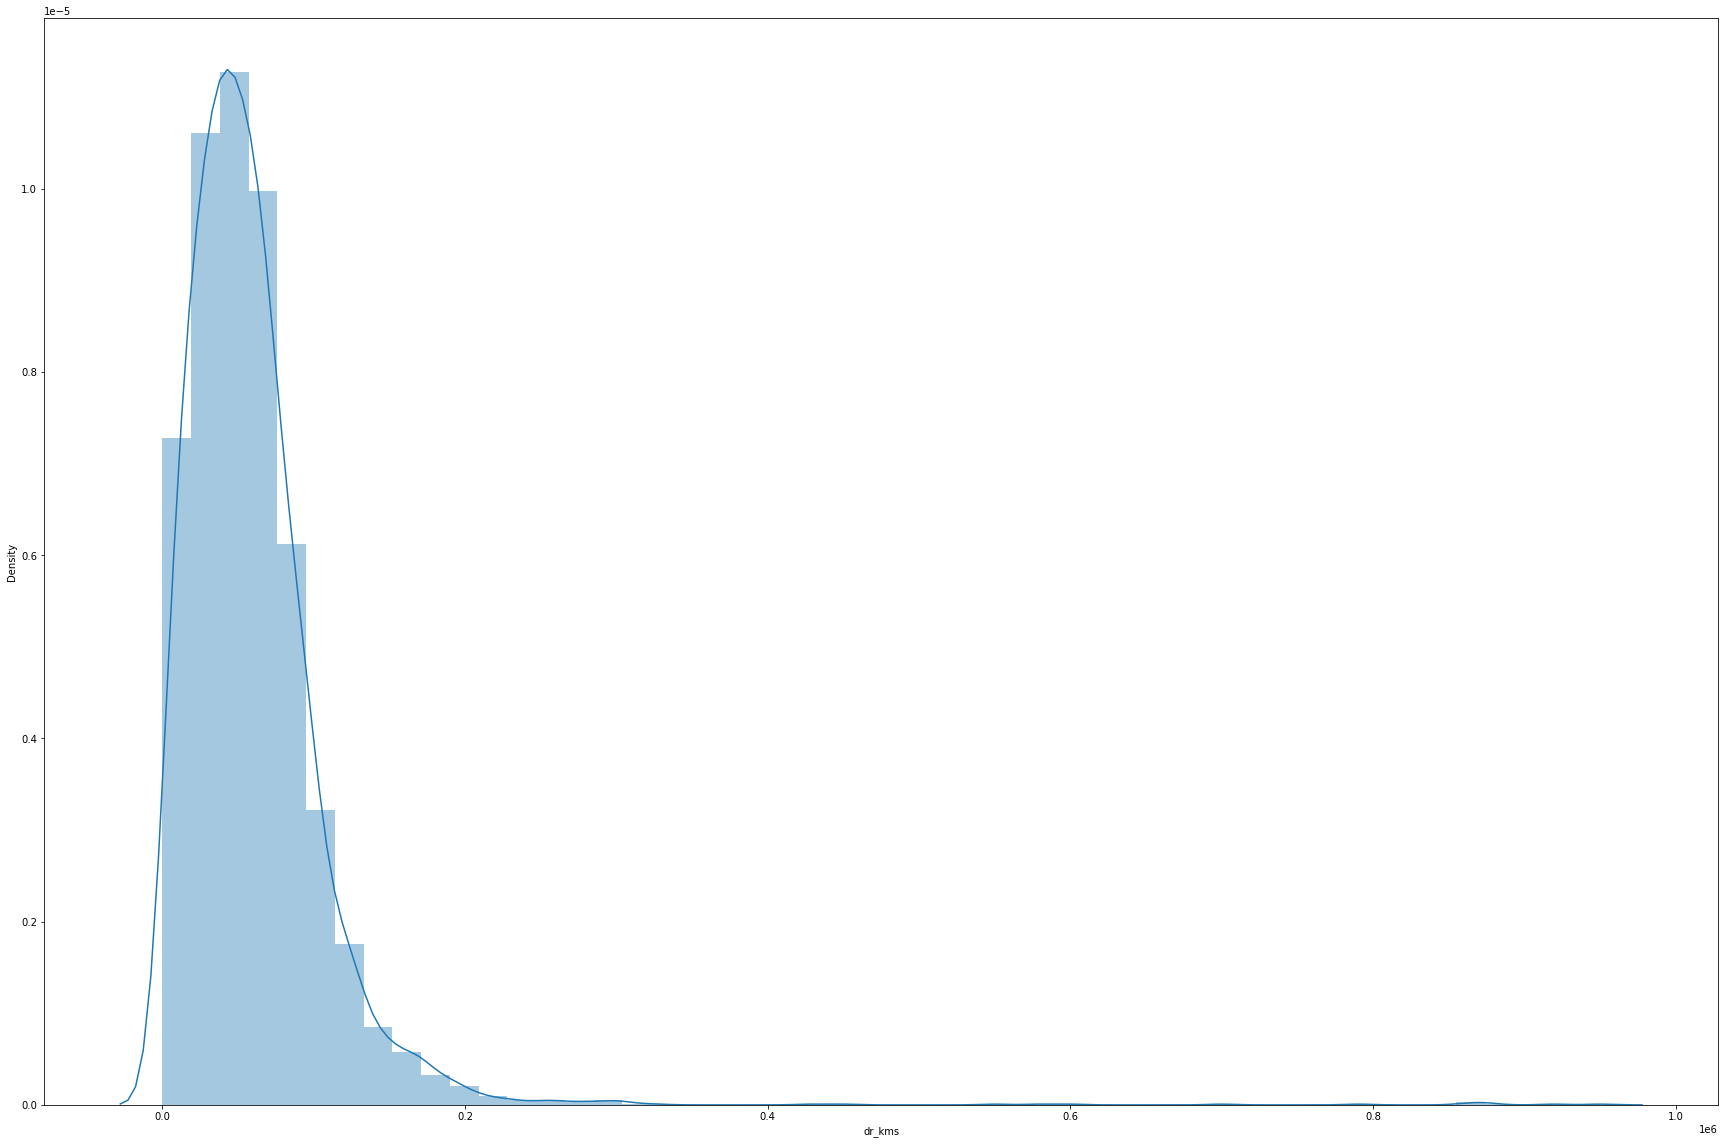

In [55]:
plt.figure(figsize=(30,20))
sns.distplot(car.dr_kms)

In [56]:
#dr_kms is left skwewd

<AxesSubplot:xlabel='mf_year'>

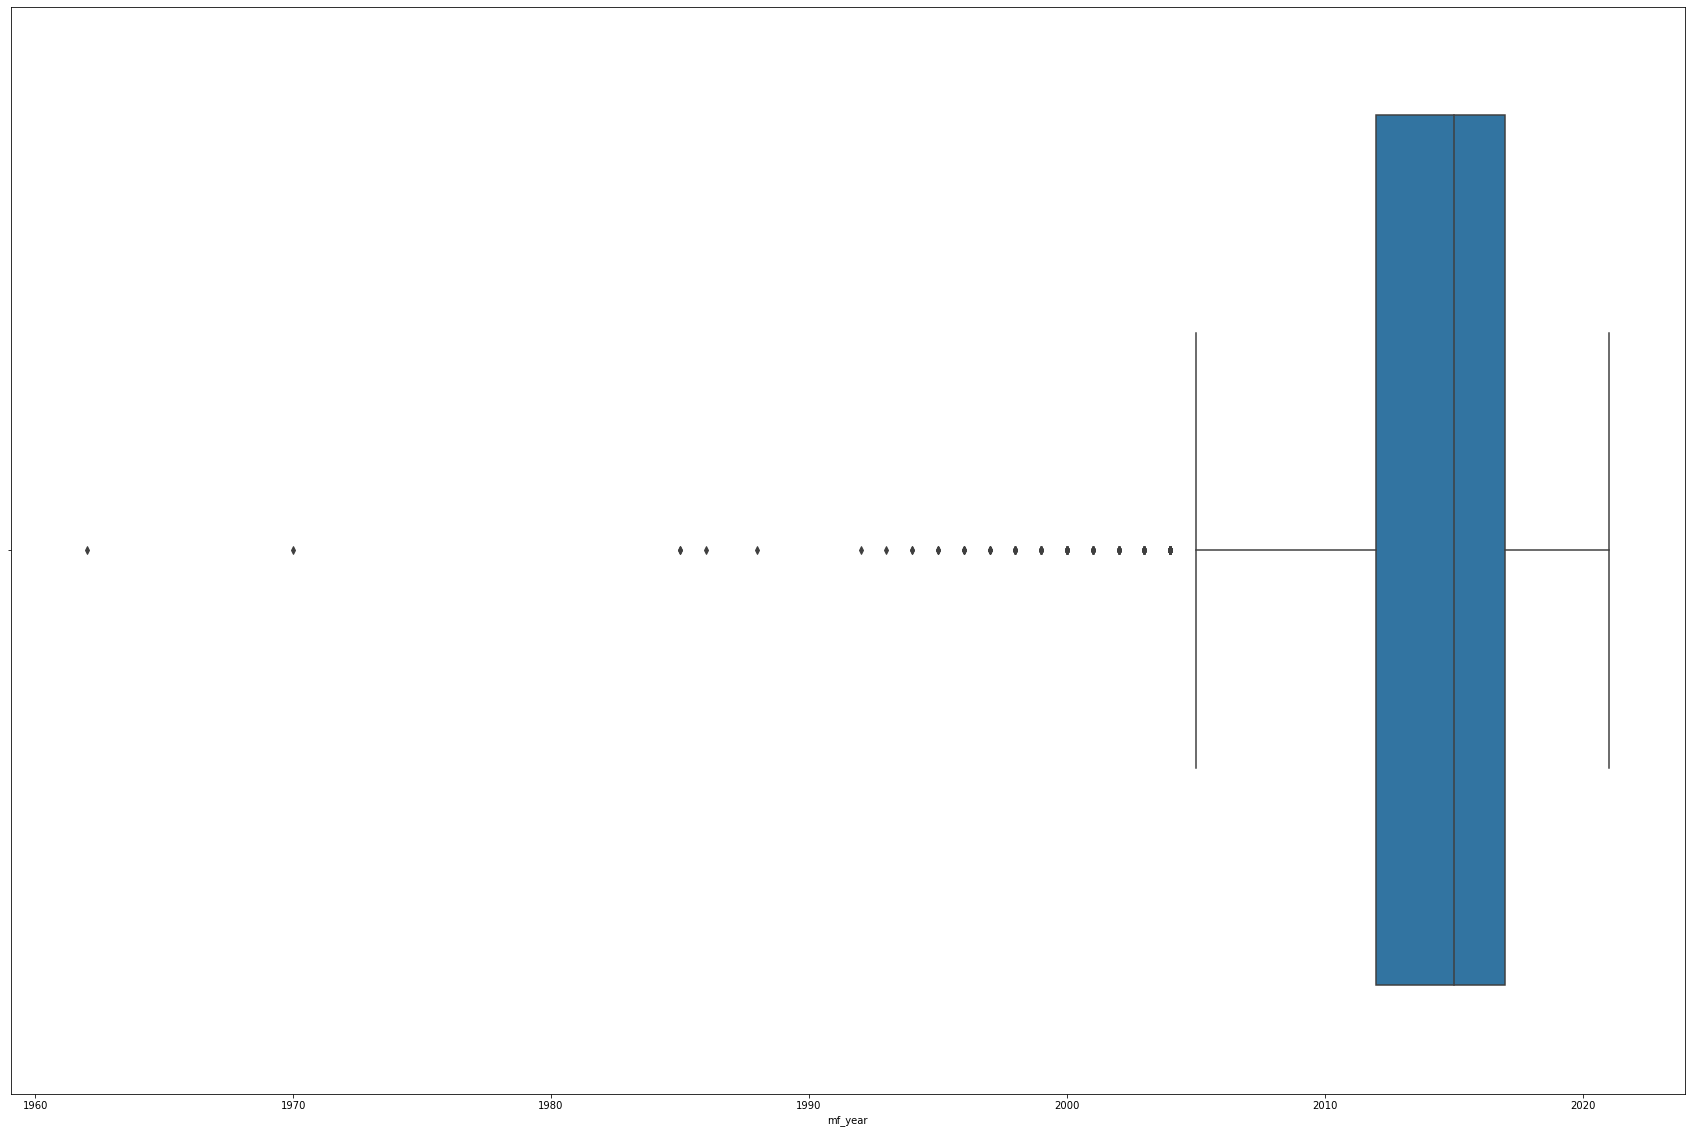

In [57]:
plt.figure(figsize=(30,20))
sns.boxplot(car.mf_year)

<AxesSubplot:xlabel='dr_kms'>

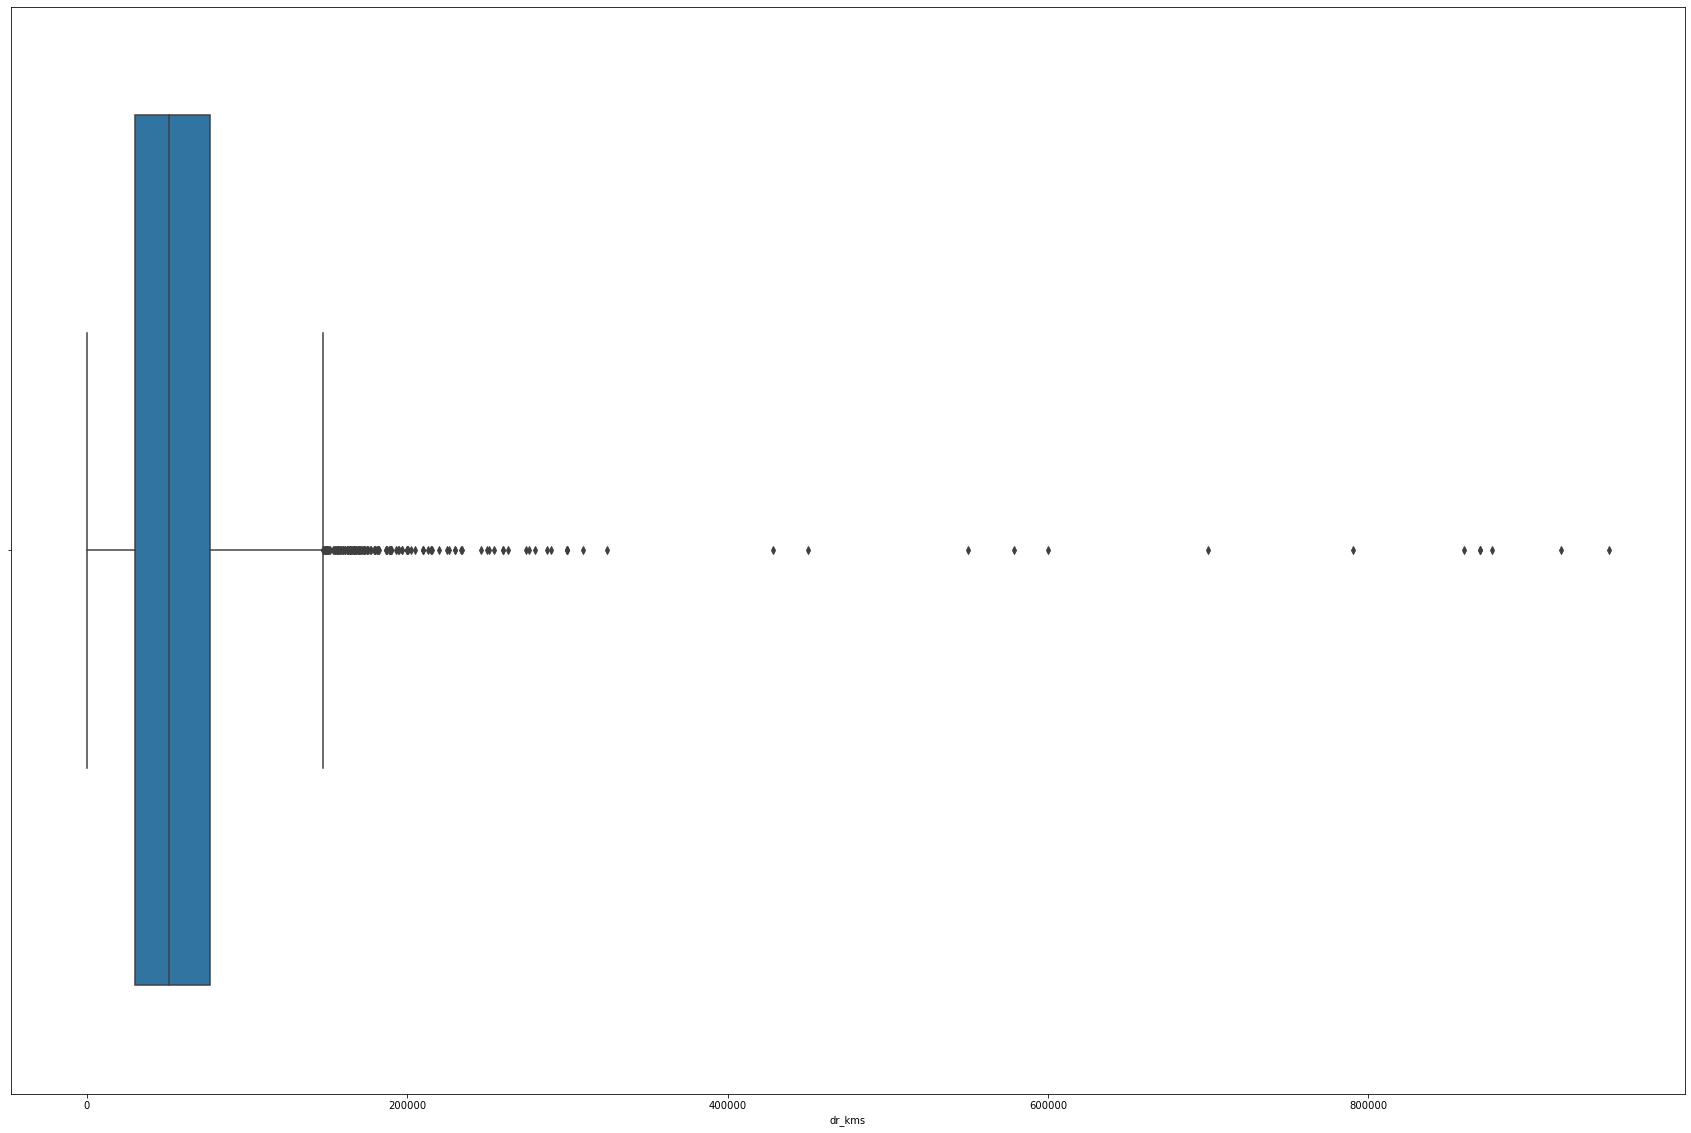

In [58]:
plt.figure(figsize=(30,20))
sns.boxplot(car.dr_kms)

In [59]:
#even though there are outliers as per the plot, decided to keep the car, because this is real values

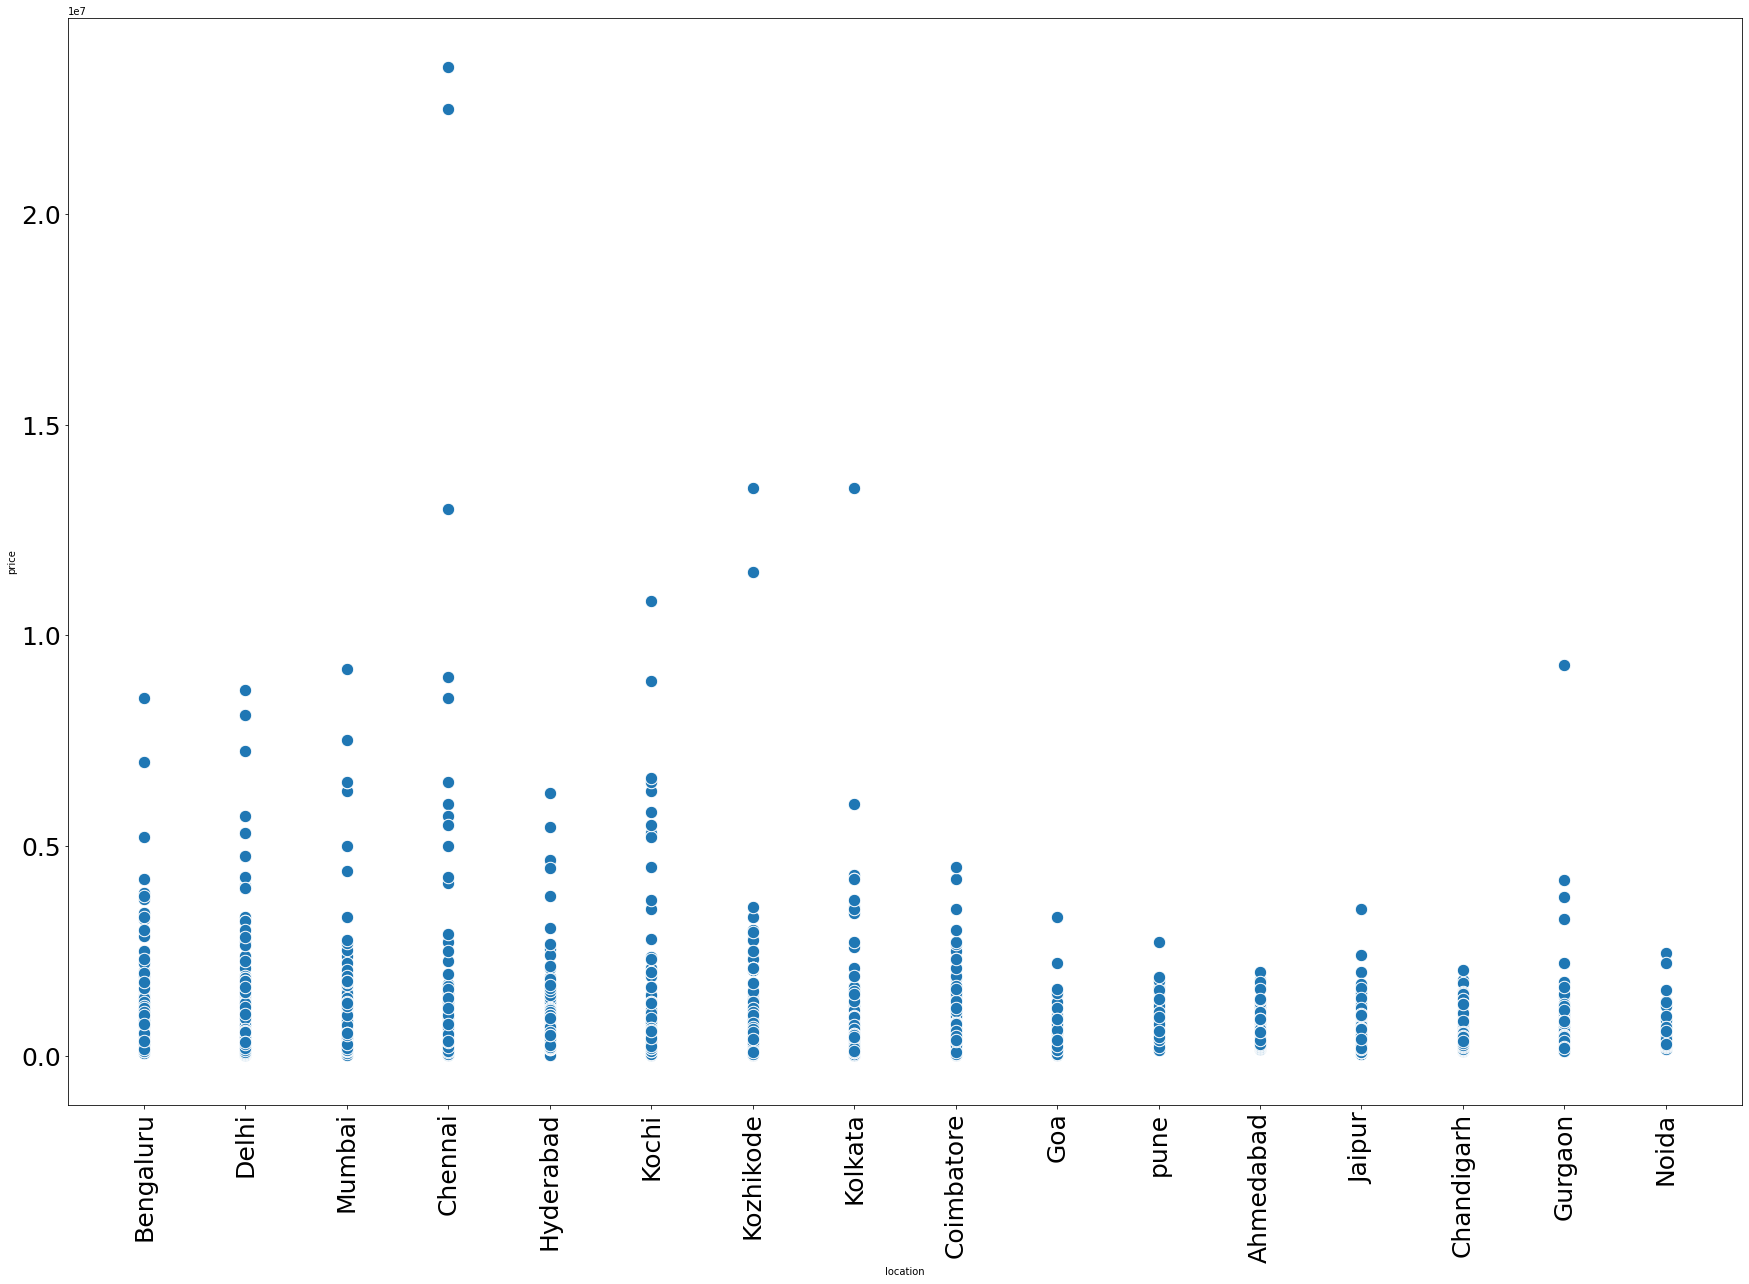

In [60]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(car.location, car.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [61]:
#the prices of the car is not much differ from city to city

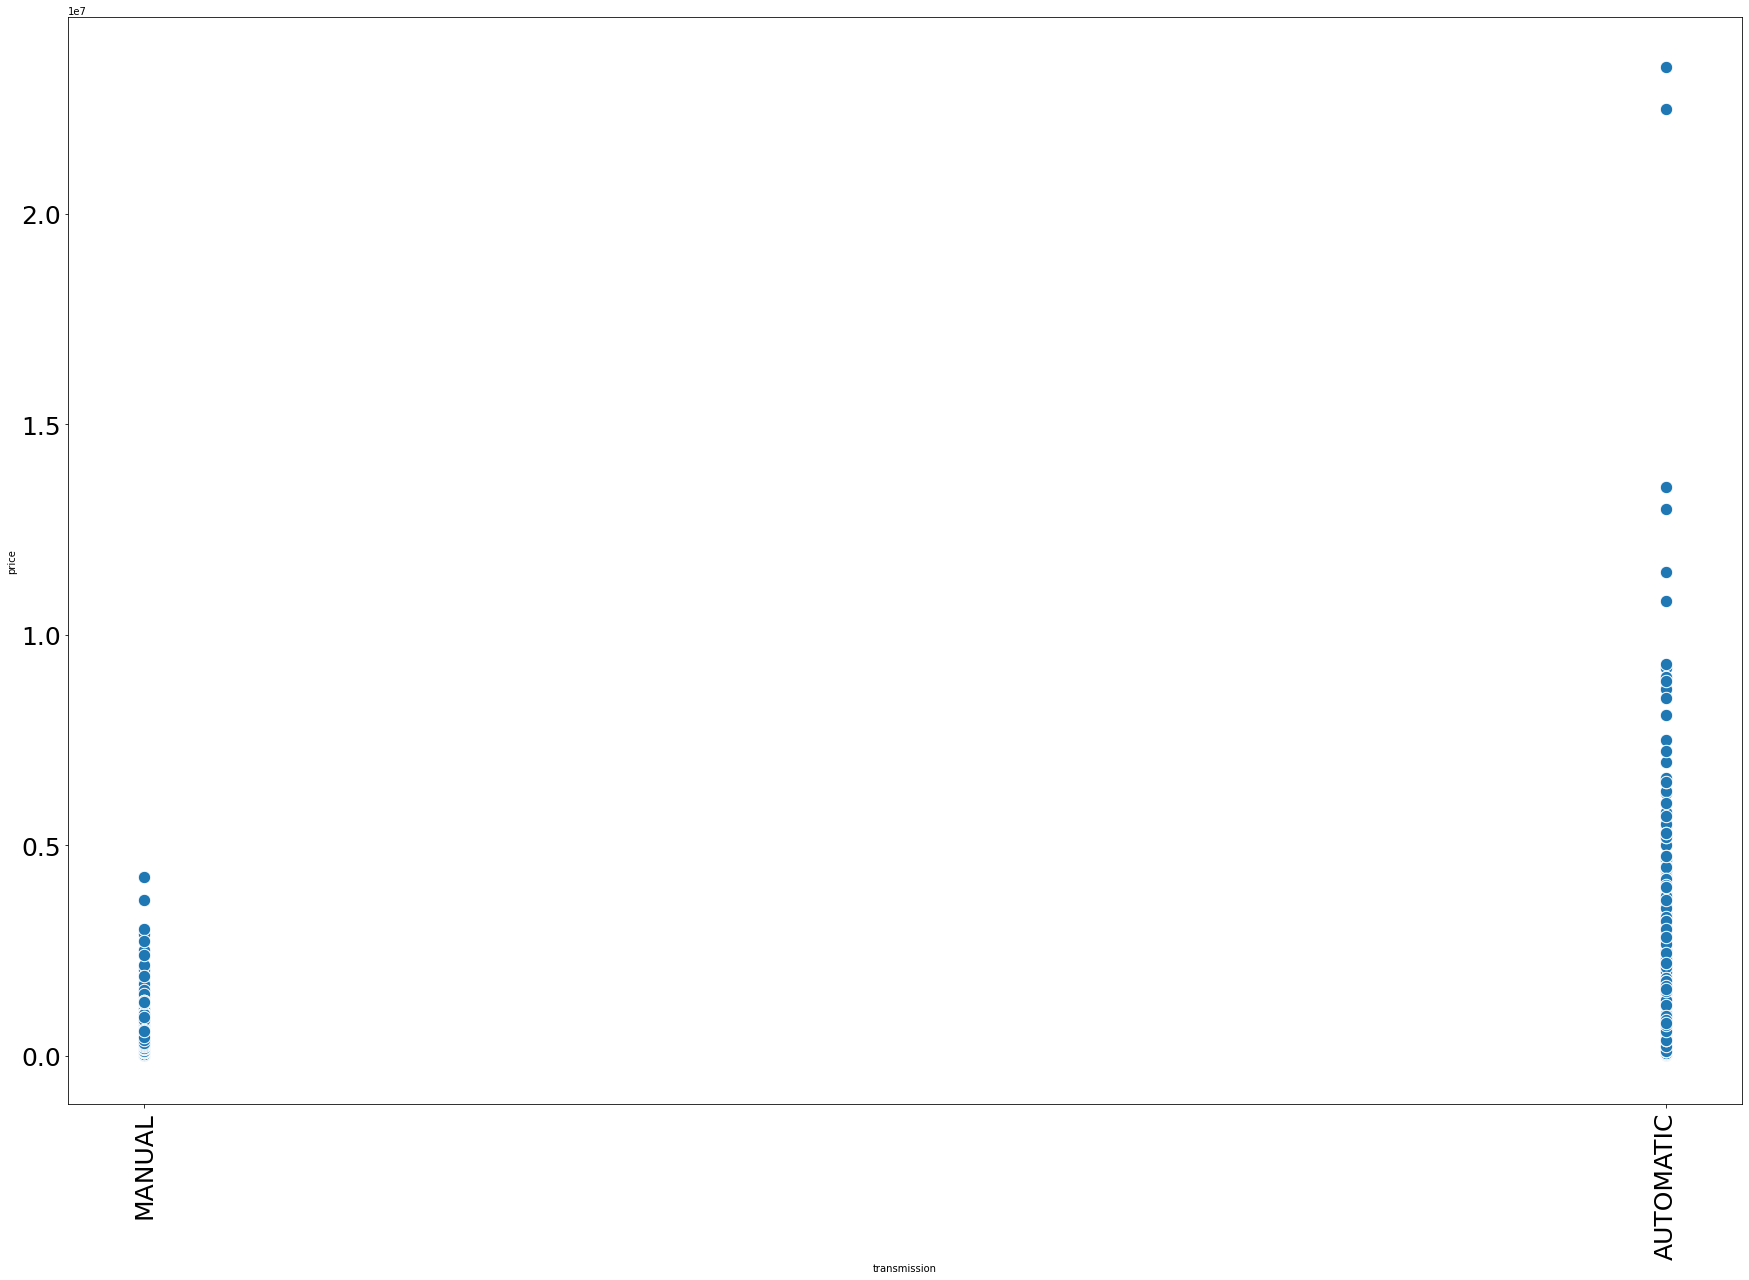

In [62]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(car.transmission, car.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [63]:
#automatic cars are more expensive

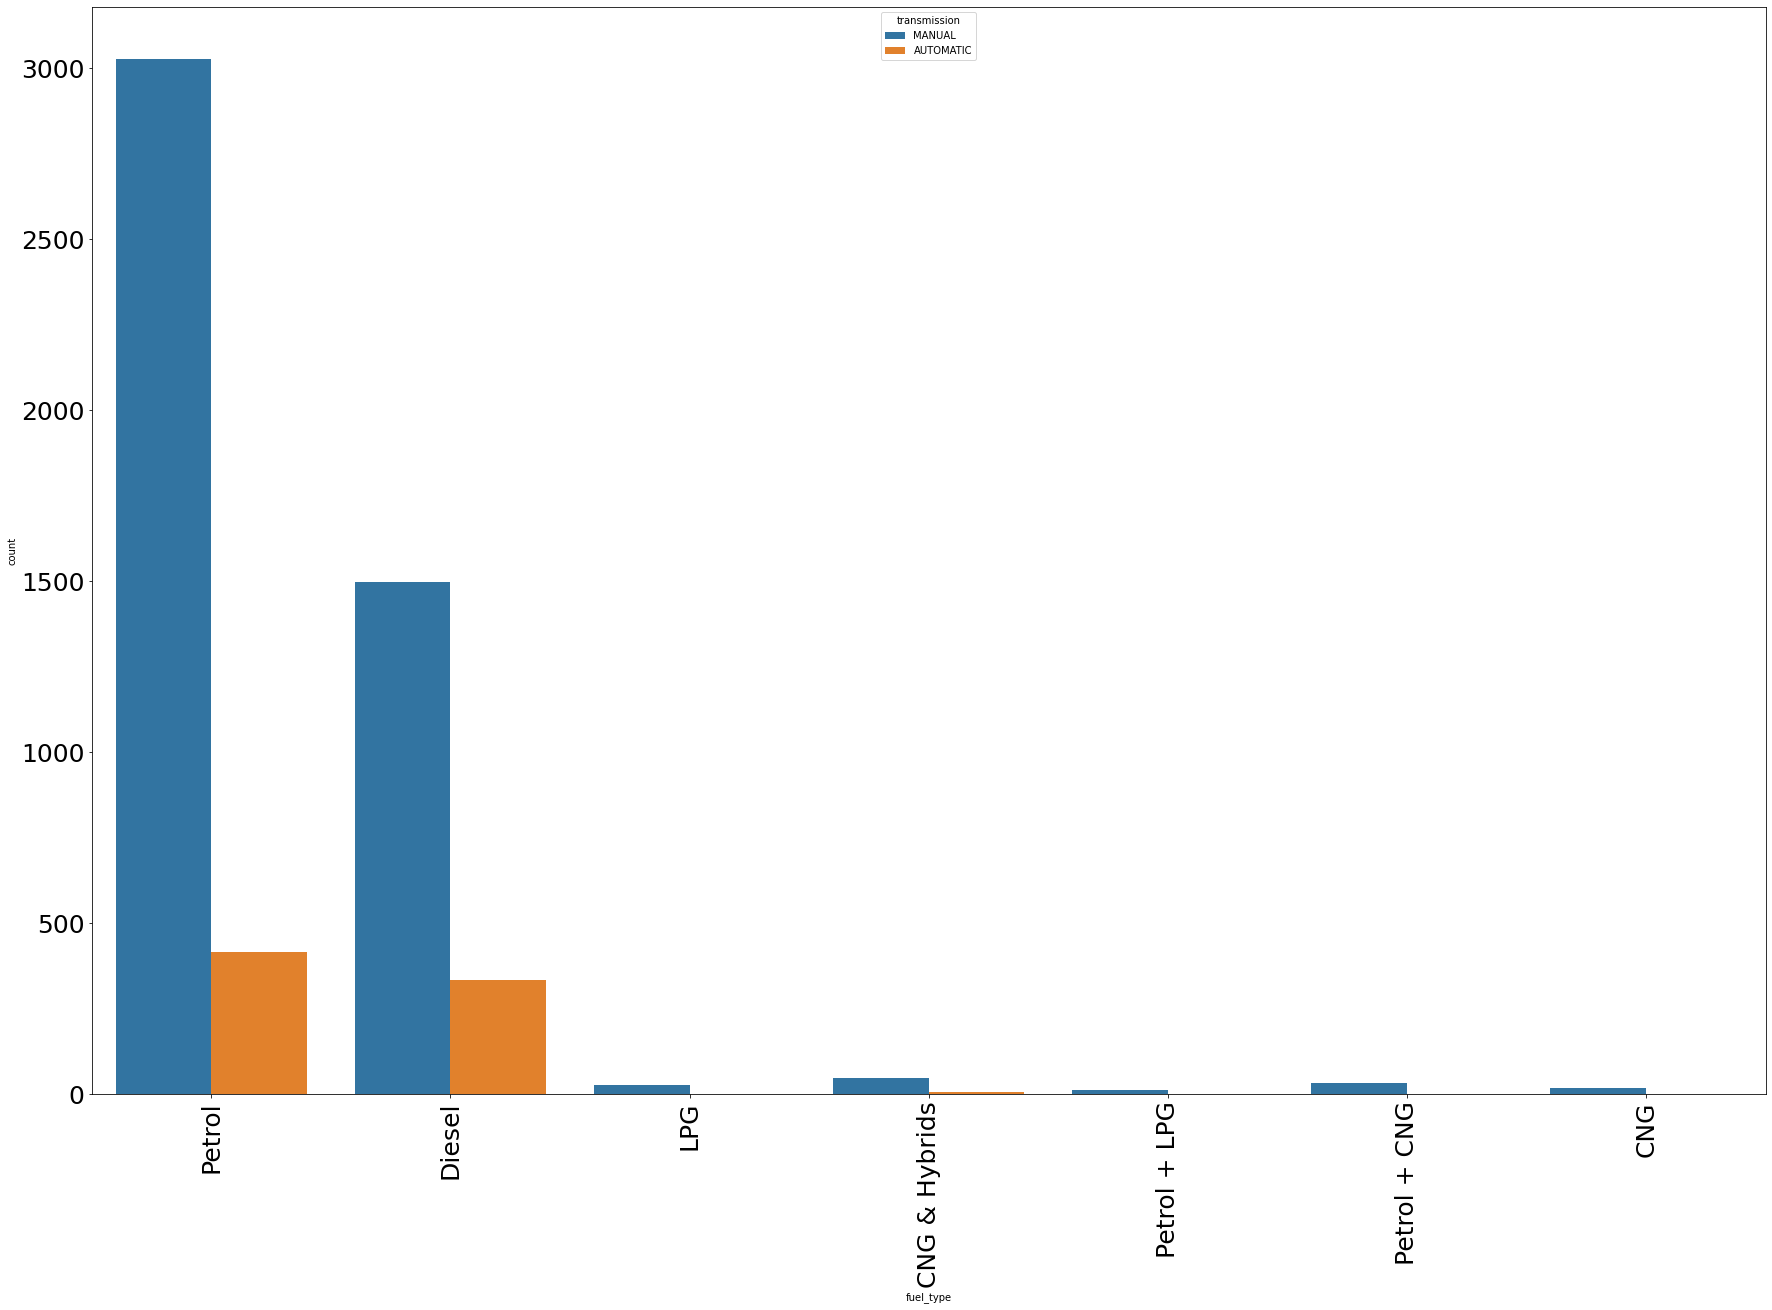

In [64]:
plt.figure(figsize=(30,20))
chart = sns.countplot(car.fuel_type, hue=car.transmission)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [65]:
#In every fuel type, manual is higher in number than automatic 

In [66]:
#consider a particular brand for a closer observation
swift = car[(car.brand == "Maruti") & (car['model'] =="Swift")]

In [67]:
swift

,brand,model,varient,mf_year,dr_kms,fuel_type,no_of_owners,location,transmission,price
10,Maruti,Swift,VXI,2006,86000,Petrol,Second Owner,Bengaluru,MANUAL,265000
23,Maruti,Swift,VDI,2011,85000,Diesel,Second Owner,Bengaluru,MANUAL,375000
34,Maruti,Swift,VDI,2010,100000,Diesel,Second Owner,Bengaluru,MANUAL,345000
35,Maruti,Swift,VXI,2007,85000,Petrol,Second Owner,Bengaluru,MANUAL,280000
48,Maruti,Swift,VVT VXI,2014,59000,Petrol,First Owner,Bengaluru,MANUAL,525000
...,...,...,...,...,...,...,...,...,...,...
5710,Maruti,Swift,Dzire VDi,2010,140000,Diesel,Second Owner,Noida,MANUAL,175000
5741,Maruti,Swift,VDI BSIV,2015,110000,Diesel,First Owner,Noida,MANUAL,380000
5749,Maruti,Swift,DDiS VDI,2017,30000,Diesel,First Owner,Noida,MANUAL,500000
5752,Maruti,Swift,LXI BSIV,2017,53000,Petrol,First Owner,Noida,MANUAL,480000


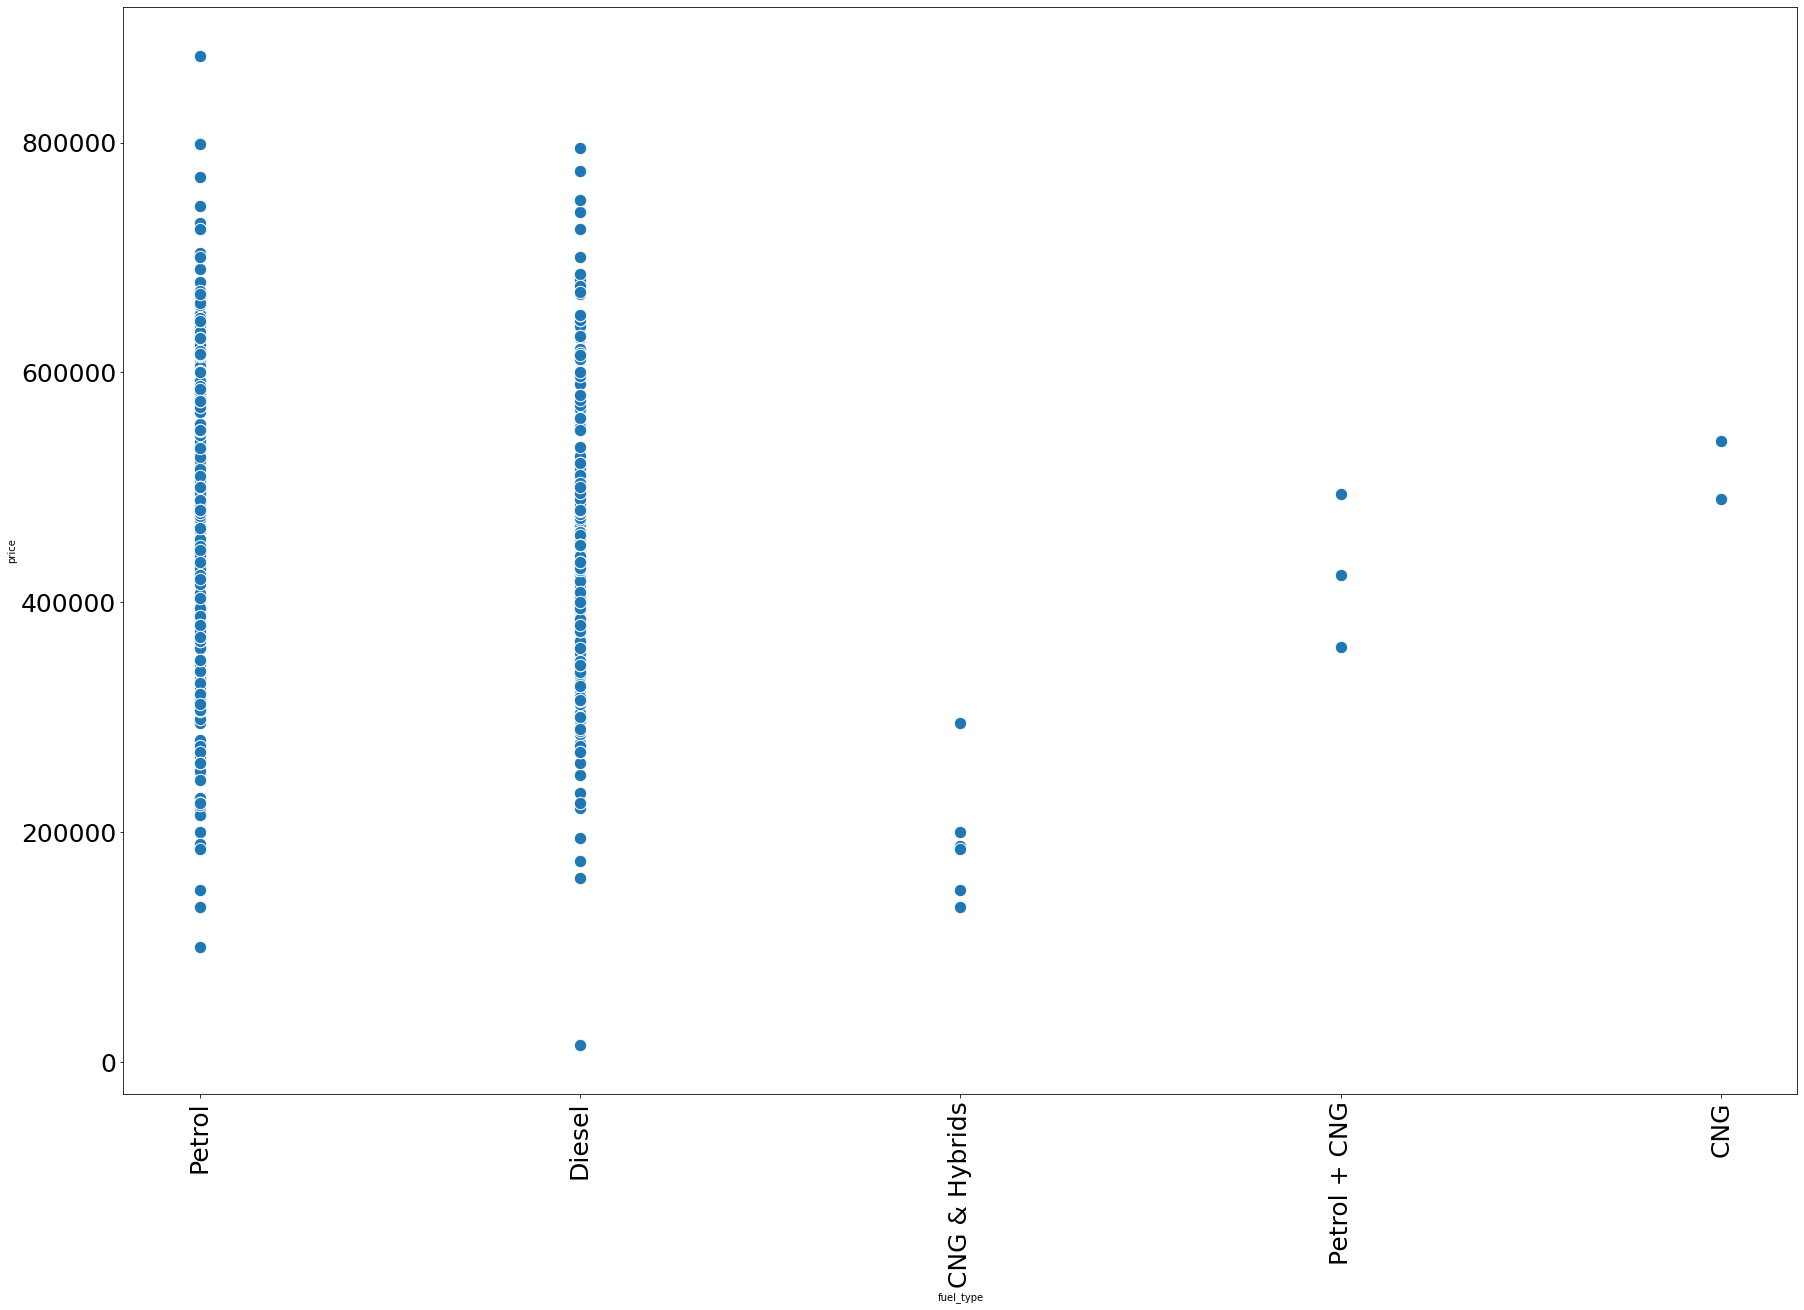

In [68]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(swift.fuel_type, swift.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [69]:
#petrol-diesel vaicles are almost in same price range, but others are cheaper

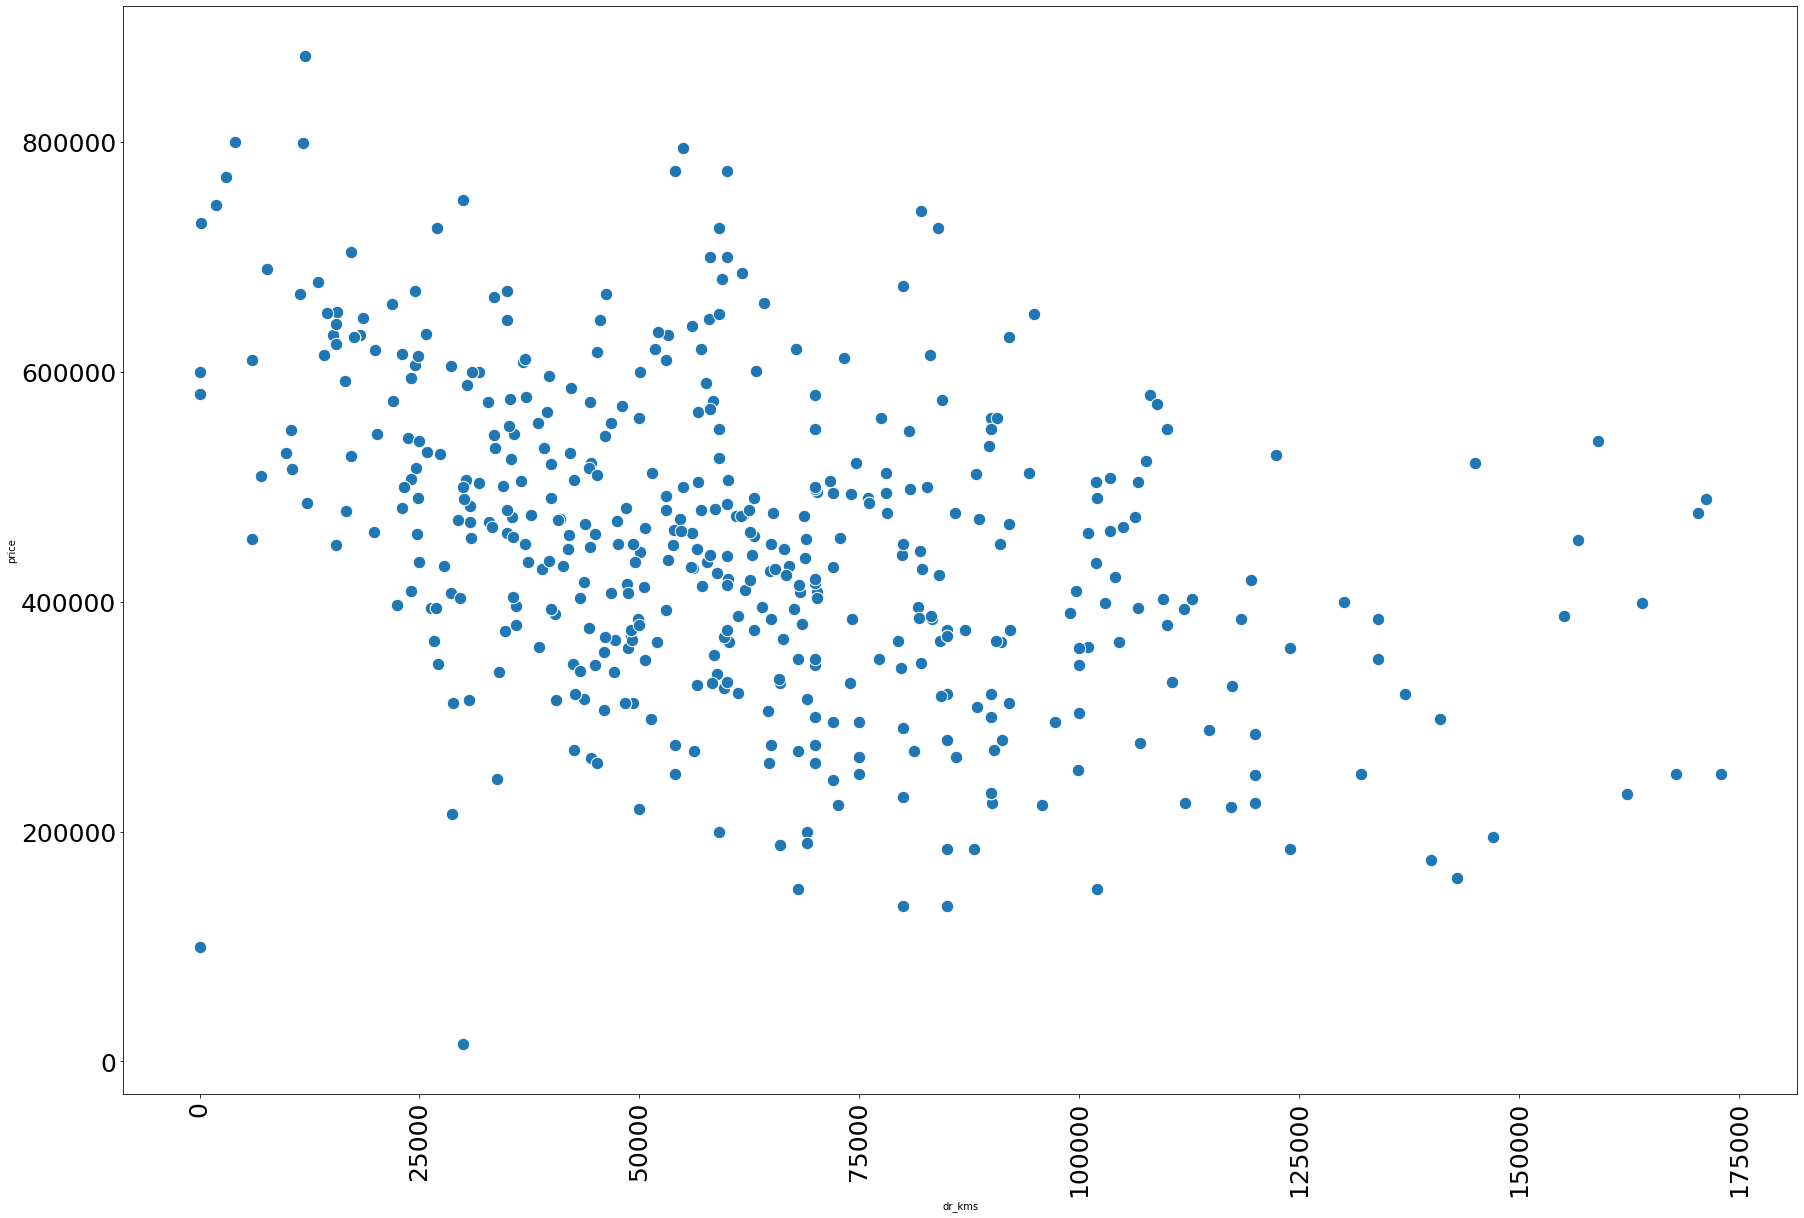

In [70]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(swift.dr_kms, swift.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [71]:
#When the driven kilometers are high, price is less

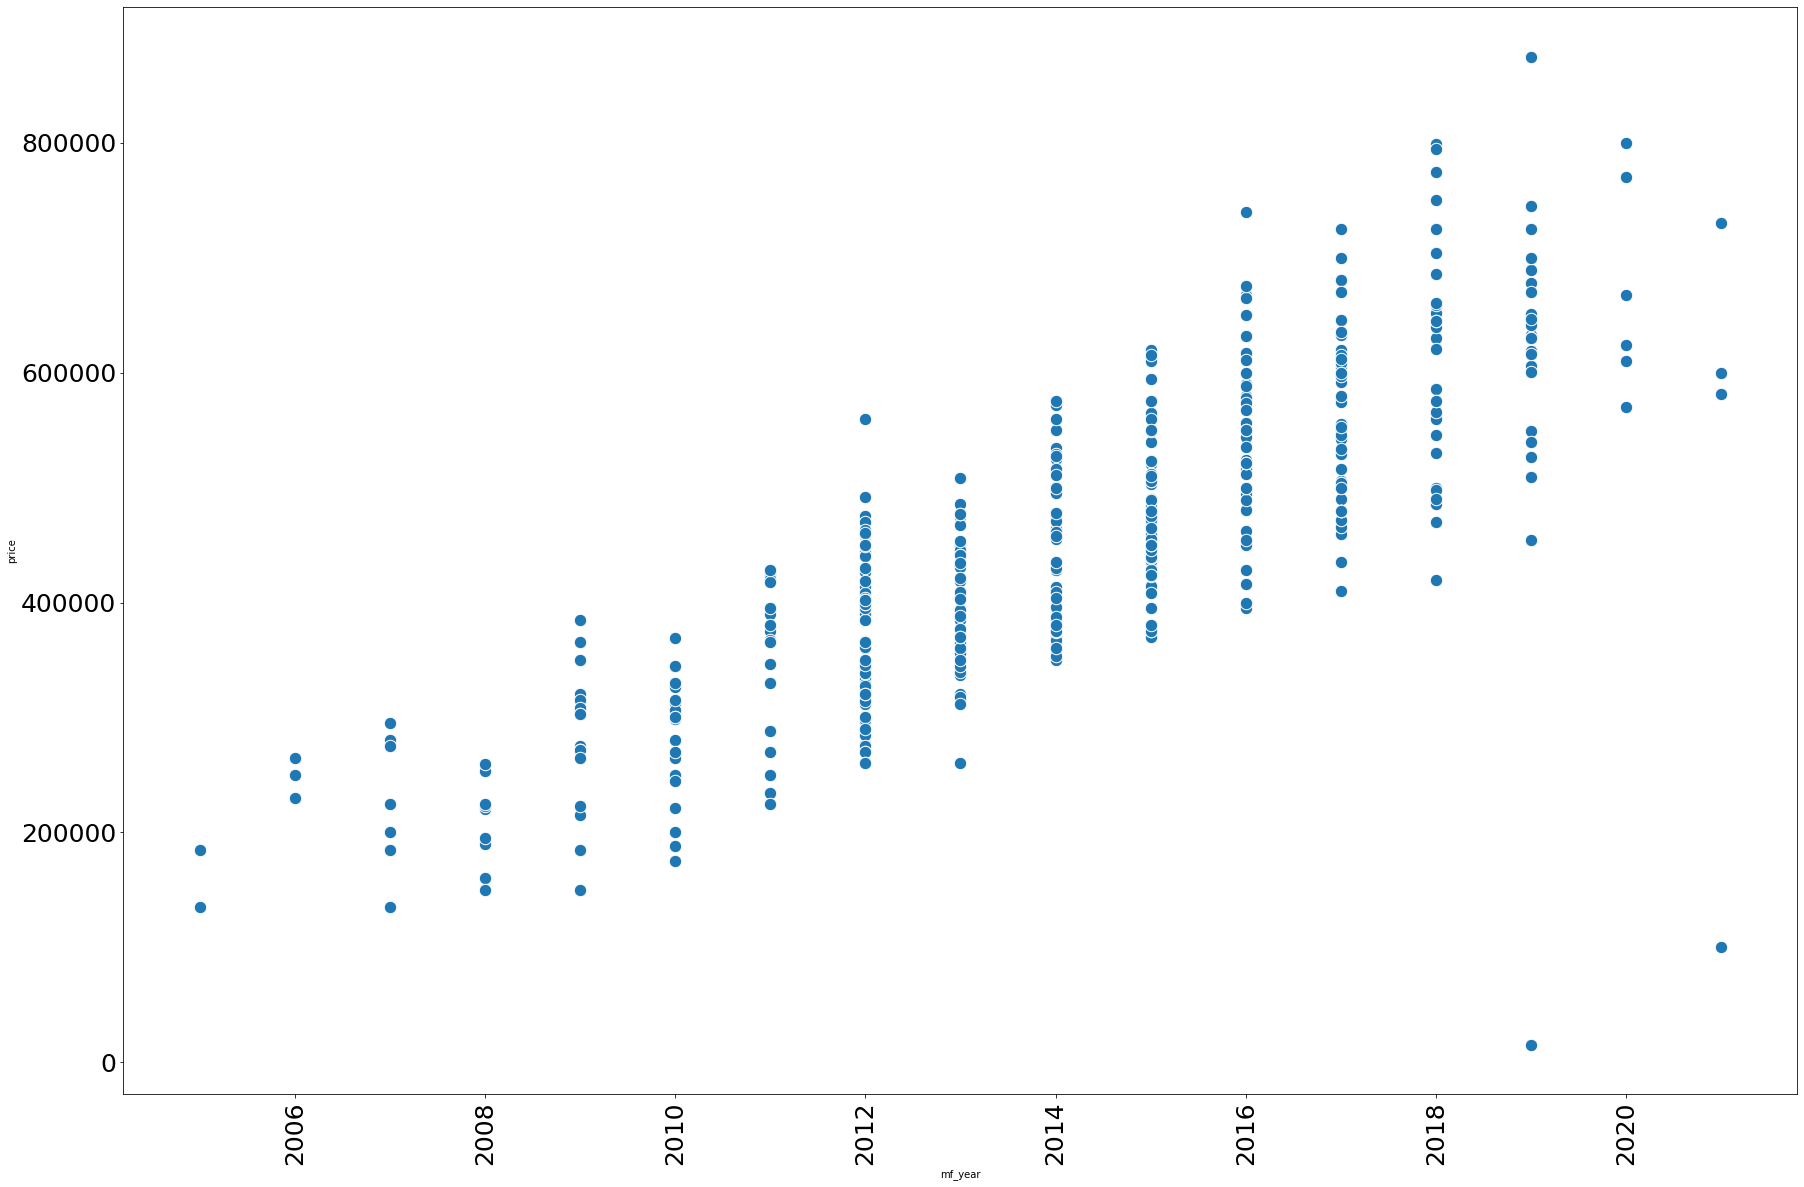

In [72]:
plt.figure(figsize=(30,20))
chart = sns.scatterplot(swift.mf_year, swift.price, s=155)
chart.tick_params(axis='x', rotation=90, labelsize = 25)
chart.tick_params(axis='y',  labelsize = 25)

In [73]:
#newer the vehicle, higher will be the price

In [74]:
corr = car.corr()

<AxesSubplot:>

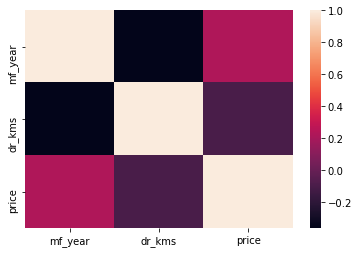

In [75]:
sns.heatmap(corr)

In [76]:
#not much correlation is found between the variables
#driven kilometers and mf year are highly -ve correlated

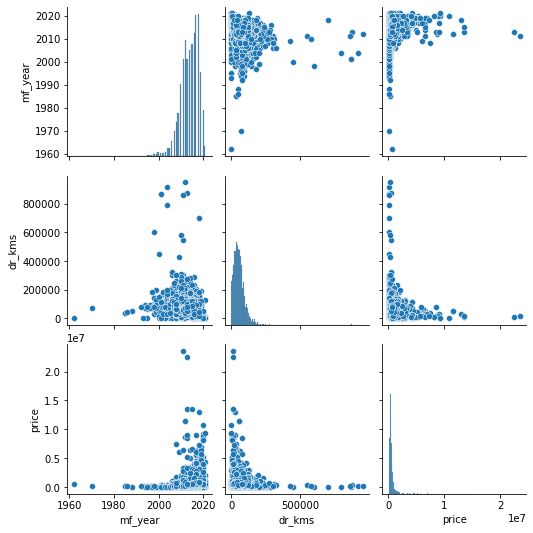

In [77]:
sns.pairplot(car)

In [78]:
car.skew()

mf_year    -1.583208
dr_kms      6.760633
price      10.180660
dtype: float64

In [79]:
#removing skewness

In [80]:
car["mf_year"] = np.sqrt(car["mf_year"])[0]
car["dr_kms"] = np.sqrt(car["dr_kms"])[0]

In [81]:
#Encoding
from sklearn.preprocessing import LabelEncoder
cat_cols = ["brand", "model", "varient", "fuel_type", "no_of_owners", "location", "transmission"]
for col in cat_cols:
    car[col] = LabelEncoder().fit_transform(car[col])

In [82]:
car

,brand,model,varient,mf_year,dr_kms,fuel_type,no_of_owners,location,transmission,price
0,17,80,864,44.888751,268.328157,4,0,1,1,625000
1,29,181,772,44.888751,268.328157,4,3,1,1,290000
2,29,250,1520,44.888751,268.328157,2,0,1,1,710000
3,39,209,224,44.888751,268.328157,2,3,1,1,415000
4,29,280,1195,44.888751,268.328157,4,0,1,1,395000
...,...,...,...,...,...,...,...,...,...,...
5776,29,249,1672,44.888751,268.328157,2,0,15,1,615000
5777,17,309,1272,44.888751,268.328157,4,0,15,0,765500
5778,29,276,882,44.888751,268.328157,2,0,15,1,919999
5779,17,309,1455,44.888751,268.328157,4,0,15,1,445000


In [83]:
x = car.iloc[:,:-1]

In [84]:
y = car.iloc[:,-1]

In [85]:
#scaling
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [88]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    if r2 > max_acc:
        max_acc = r2
        max_rs = i
print("Best random state=",max_rs)

Best random state= 180


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = 44)

In [90]:
models = {"SVR":SVR(),"KNN":KNeighborsRegressor(), "RandomForest":RandomForestRegressor(),
          "LinearRegression":LinearRegression(), "Ridge":Ridge(), "dtr":DecisionTreeRegressor() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    #mod = DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    r2_sc = r2_score(y_test,pred)
    acc[i] = r2_sc
    mod_list.append(mod)
print(acc)

{'SVR': -0.06098555762736457, 'KNN': 0.017600004792900026, 'RandomForest': 0.6208230217100357, 'LinearRegression': 0.22681972869206657, 'Ridge': 0.22726266082261815, 'dtr': 0.5026174879947103}


In [91]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [92]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=7)
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVR()': -0.06638761520341727, 'KNeighborsRegressor()': -0.1071934385111805, 'RandomForestRegressor()': 0.4889923440924538, 'LinearRegression()': 0.039346909887595594, 'Ridge()': 0.040192939950451353, 'DecisionTreeRegressor()': -2.1456452687431717}


In [93]:
#Randomforest is the best model

In [94]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [96]:
GCV = GridSearchCV(RandomForestRegressor(),param_grid=param_grid, cv=7)

In [97]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [98]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 12}

In [99]:
GCV_predict = GCV.best_estimator_.predict(x_test)

In [100]:
r2_score(y_test, GCV_predict)

0.5472034454289483

In [101]:
#saving model
import joblib
joblib.dump(GCV.best_estimator_, "car_price.obj")

['car_price.obj']